In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
%fs ls /mnt/hackathonsonda2021

path,name,size
dbfs:/mnt/hackathonsonda2021/BASE_GENERAL.csv,BASE_GENERAL.csv,255283
dbfs:/mnt/hackathonsonda2021/VALIDACION.csv,VALIDACION.csv,136118
dbfs:/mnt/hackathonsonda2021/VALIDACION_FORMATO.csv,VALIDACION_FORMATO.csv,127643


In [ ]:
# Exportamos el archivo CSV de la base de datos
file_location = "/dbfs/mnt/hackathonsonda2021/BASE_GENERAL.csv"
delimiter = ";"
df = pd.read_csv(file_location, delimiter=delimiter, encoding = "ISO-8859-1")
df.shape

Out[2]: (2294, 20)

In [ ]:
df.head(10)

Out[3]:

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1.0,M,746476,39.0,MED,CAS,68,213,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA
1,2.0,F,11901,49.0,MED,VIU,16,89,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA
2,3.0,M,1651421,39.0,TEC,CAS,90,16,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA
3,4.0,F,638969,36.0,UNV,CAS,85,115,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA
4,5.0,M,860113,44.0,TEC,CAS,45,80,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA
5,6.0,M,329463,40.0,TEC,CAS,53,92,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,NO,FUGA
6,7.0,M,28732,45.0,UNV,CAS,55,90,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,NO,FUGA
7,8.0,F,11563,41.0,TEC,SOL,47,112,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,SI,NO FUGA
8,9.0,F,3044549,33.0,MED,CAS,22,1,ARICA,0,102078,0,0,44,0,0,1,1600000,NO,NO FUGA
9,10.0,F,3632707,39.0,MED,VIU,27,89,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,NO,NO FUGA


In [ ]:
# Eliminamos las variables innecesarias
df.drop(["ID"],axis='columns',inplace=True)
df.shape

Out[4]: (2294, 19)

In [ ]:
# Evaluamos los tipos de variables
df.dtypes

Out[5]: GENERO object
RENTA int64
EDAD float64
NIV_EDUC object
E_CIVIL object
COD_OFI int64
COD_COM object
CIUDAD object
D_Marzo int64
D_Abril int64
D_Mayo int64
D_Junio int64
D_Julio int64
D_Agosto int64
D_Septiembre int64
M_MOROSO int64
MONTO int64
SEGURO object
FUGA object
dtype: object

In [ ]:
# Obtenemos los valores categoricos tipo String para revisarlas internamente y 
# limpiar espacios y valores nulos que pudiesen existir
col_type_objects = []
for column in df:
    if df[column].dtypes == 'object':
        col_type_objects.append(column)
col_type_objects

Out[6]: ['GENERO', 'NIV_EDUC', 'E_CIVIL', 'COD_COM', 'CIUDAD', 'SEGURO', 'FUGA']

In [ ]:
# Al revisar internamente encontramos valores que tiene espacios en sus extremos lo que pudieran tradurce
# en un error de comparaciones y tratamiento por lo que limpiamos los espacios en blanco por cada columna
for column in col_type_objects:
    df[column] = df[column].str.strip()

In [ ]:
# Revisamos los valores únicos de las variables categoricas y encontramos que estos
# poseen valores vacios y datos nulos los cuales son contados como un valor adicional. 
# (Por ejemplo Nivel Educativo indica que existen 6 categorias en vez de las 5 que realemente tiene)
for column in col_type_objects:
    print(f'{column} : {df[column].unique()} cant={df[column].nunique()}')

GENERO : ['M' 'F' nan] cant=2
NIV_EDUC : ['MED' 'TEC' 'UNV' 'BAS' '' 'EUN'] cant=6
E_CIVIL : ['CAS' 'VIU' 'SOL' 'SEP' nan] cant=4
COD_COM : ['213' '89' '16' '115' '80' '92' '90' '112' '1' '103' '93' '105' '110'
 '88' '119' '85' '226' '227' '108' '253' '86' '131' '87' '98' '502' '104'
 '287' '13' '100' '326' '83' '513' '71' '96' '113' '284' '91' '5' '118'
 '67' '84' '127' '95' '29' '53' '138' '300' '193' '106' '184' '128' '272'
 '97' '504' '314' '81' '111' '301' '31' '265' '164' '49' '176' '' '82'
 '117' '313' '298' '516' '285' '70' '23' '122' '173' '148' '291' '59' '66'
 '101' '94' '61' '79' '511' '124' '316' '99' '42' '279' '102' '120' '234'
 '22' '292' '182' '126' '11' '116' '242' '186' '50' '107' '63' '74' '121'
 '135' '25' '294' '153' '27' '275' '261' '60' '45' '109' '510' '35' '146'
 '228'] cant=118
CIUDAD : ['LOS ANGELES' 'SANTIAGO' 'ANTOFAGASTA' 'ARICA' 'CONCEPCION' 'TALCAHUANO'
 'TEMUCO' 'RANCAGUA' 'CHUQUICAMATA' 'PUERTO OCTAY' 'CALAMA' 'PUNTA ARENAS'
 'CON-CON' 'VLLA ALEMANA' 'OSORNO' 'IQUIQUE' 'VINA DEL MAR' 'TALAGANTE'
 'LA SERENA' 'SAN FELIPE' 'RENGO' 'CASTRO' 'CHILLAN' 'COLBUN' 'PENAFLOR'
 'VALDIVIA' 'EL SALVADOR' 'COYHAIQUE' 'ANCUD' 'COQUIMBO' 'LONCOCHE'
 'CURICO' 'LOS ANDES' 'SAN CLEMENTE' '' 'PALENA' 'LLANQUIHUE' 'LLO-LLEO'
 'SAN PABLO' 'QUILPUE' 'CALDERA' 'MELIPILLA' 'TALCA' 'SAN FERNANDO'
 'PUERTO MONTT' 'QUILLOTA' 'VALPARAISO' 'LA CALERA' 'STO DOMINGO'
 'CURACAVI' 'AYSEN' 'LOS VILOS' 'PANGUIPULLI' 'CORONEL' 'COPIAPO'
 'PUERTO VARAS' 'LINARES' 'SAN PEDRO' 'TOCOPILLA' 'ANGOL' 'PARRAL'
 'SAN ESTEBAN' 'HIJUELAS' 'SAN ANTONIO' 'MACHALI' 'VALLENAR' 'CALBUCO'
 'SANTA CRUZ' 'HUASCO' 'LOS LAGOS' 'VILLARRICA' 'LA CRUZ' 'PETORCA'
 'OVALLE' 'DONIHUE' 'PENCO'] cant=76
SEGURO : ['NO' 'SI'] cant=2
FUGA : ['NO FUGA' 'FUGA'] cant=2

In [ ]:
# Los valores vacios diferentes de null los convertiremos en None para poder 
# calcular el % de registros nulos posibles de desechar
for column in col_type_objects:
    df[column].replace({'':None},inplace=True)
    print(f'{column} : {df[column].unique()} cant={df[column].nunique()}')

GENERO : ['M' 'F' nan] cant=2
NIV_EDUC : ['MED' 'TEC' 'UNV' 'BAS' None 'EUN'] cant=5
E_CIVIL : ['CAS' 'VIU' 'SOL' 'SEP' nan] cant=4
COD_COM : ['213' '89' '16' '115' '80' '92' '90' '112' '1' '103' '93' '105' '110'
 '88' '119' '85' '226' '227' '108' '253' '86' '131' '87' '98' '502' '104'
 '287' '13' '100' '326' '83' '513' '71' '96' '113' '284' '91' '5' '118'
 '67' '84' '127' '95' '29' '53' '138' '300' '193' '106' '184' '128' '272'
 '97' '504' '314' '81' '111' '301' '31' '265' '164' '49' '176' None '82'
 '117' '313' '298' '516' '285' '70' '23' '122' '173' '148' '291' '59' '66'
 '101' '94' '61' '79' '511' '124' '316' '99' '42' '279' '102' '120' '234'
 '22' '292' '182' '126' '11' '116' '242' '186' '50' '107' '63' '74' '121'
 '135' '25' '294' '153' '27' '275' '261' '60' '45' '109' '510' '35' '146'
 '228'] cant=117
CIUDAD : ['LOS ANGELES' 'SANTIAGO' 'ANTOFAGASTA' 'ARICA' 'CONCEPCION' 'TALCAHUANO'
 'TEMUCO' 'RANCAGUA' 'CHUQUICAMATA' 'PUERTO OCTAY' 'CALAMA' 'PUNTA ARENAS'
 'CON-CON' 'VLLA ALEMANA' 'OSORNO' 'IQUIQUE' 'VINA DEL MAR' 'TALAGANTE'
 'LA SERENA' 'SAN FELIPE' 'RENGO' 'CASTRO' 'CHILLAN' 'COLBUN' 'PENAFLOR'
 'VALDIVIA' 'EL SALVADOR' 'COYHAIQUE' 'ANCUD' 'COQUIMBO' 'LONCOCHE'
 'CURICO' 'LOS ANDES' 'SAN CLEMENTE' None 'PALENA' 'LLANQUIHUE' 'LLO-LLEO'
 'SAN PABLO' 'QUILPUE' 'CALDERA' 'MELIPILLA' 'TALCA' 'SAN FERNANDO'
 'PUERTO MONTT' 'QUILLOTA' 'VALPARAISO' 'LA CALERA' 'STO DOMINGO'
 'CURACAVI' 'AYSEN' 'LOS VILOS' 'PANGUIPULLI' 'CORONEL' 'COPIAPO'
 'PUERTO VARAS' 'LINARES' 'SAN PEDRO' 'TOCOPILLA' 'ANGOL' 'PARRAL'
 'SAN ESTEBAN' 'HIJUELAS' 'SAN ANTONIO' 'MACHALI' 'VALLENAR' 'CALBUCO'
 'SANTA CRUZ' 'HUASCO' 'LOS LAGOS' 'VILLARRICA' 'LA CRUZ' 'PETORCA'
 'OVALLE' 'DONIHUE' 'PENCO'] cant=75
SEGURO : ['NO' 'SI'] cant=2
FUGA : ['NO FUGA' 'FUGA'] cant=2

In [ ]:
# Luego de la tranformaciones ahora si podemos contar la cantidad de NaN totales en los registros a eliminar
df.isnull().sum().sum()

Out[10]: 41

In [ ]:
# Calculamos el porcentaje de valores nulos del total de la muestra
na_ratio = (df.isnull().sum().sum() / len(df))*100
print("%.3f " % na_ratio)

1.787

In [ ]:
# Ya que la cantidad de registros con algún valor nulo es menos del 5%,
# procedemos a eliminar dichos registros
df = df.dropna()

In [ ]:
#volvemos a revisar y nos aseguramos que los valres nulos no existan
df.isnull().sum().sum()

Out[13]: 0

In [ ]:
#Al revisar el dataset nuevamente podemos ver que los valores nulos ya no estan y tenemos la muestra limpia
for column in df:
    print(f'{column} : {df[column].unique()} cant={df[column].nunique()}')

GENERO : ['M' 'F'] cant=2
RENTA : [ 746476 11901 1651421 ... 725881 4034859 47099] cant=2254
EDAD : [ 39. 49. 36. 44. 40. 45. 41. 33. 46. 37. 48. 43. 54. 47.
 51. 29. 52. 27. 28. 38. 55. 53. 26. 50. 35. 57. 42. 60.
 30. 32. 62. 31. 34. 56. 64. 24. 25. 59. 58. 23. 63. 61.
 115. -21. -34. 130. -50. 99.] cant=48
NIV_EDUC : ['MED' 'TEC' 'UNV' 'BAS' 'EUN'] cant=5
E_CIVIL : ['CAS' 'VIU' 'SOL' 'SEP'] cant=4
COD_OFI : [ 68 16 90 85 45 53 55 47 22 27 41 139 52 122 80 128 152 19
 138 31 77 13 60 116 92 102 124 125 37 21 127 30 123 12 24 25
 20 84 29 104 18 149 101 73 15 40 34 100 76 120 61 74 10 83
 39 54 98 126 32 57 69 56 108 118 63 67 50 14 129 48 78 66
 51 59 72 64 130 88 94 42 70 107 49 44 151 103 38 153 79 35
 43 144 71 81 141 0 132 142 96 17 105 134 86 82 75 131 95 91
 140 93 23 62 87 46 28 117 11 121 146 65 33 155 147 36 89] cant=125
COD_COM : ['213' '89' '16' '115' '80' '92' '90' '112' '1' '103' '93' '105' '110'
 '88' '85' '119' '226' '227' '108' '253' '131' '87' '98' '502' '104' '287'
 '13' '100' '326' '83' '86' '513' '71' '96' '113' '284' '91' '5' '118'
 '67' '84' '127' '95' '29' '53' '138' '300' '193' '106' '184' '128' '272'
 '97' '504' '314' '81' '111' '301' '31' '265' '164' '49' '176' '82' '117'
 '313' '298' '285' '70' '23' '122' '516' '173' '148' '291' '59' '66' '101'
 '61' '79' '511' '124' '316' '99' '42' '279' '102' '120' '234' '22' '292'
 '182' '126' '11' '94' '116' '242' '186' '50' '107' '63' '74' '121' '135'
 '25' '294' '153' '27' '275' '261' '60' '45' '109' '510' '35' '228'] cant=116
CIUDAD : ['LOS ANGELES' 'SANTIAGO' 'ANTOFAGASTA' 'ARICA' 'CONCEPCION' 'TALCAHUANO'
 'TEMUCO' 'RANCAGUA' 'CHUQUICAMATA' 'PUERTO OCTAY' 'CALAMA' 'PUNTA ARENAS'
 'CON-CON' 'VLLA ALEMANA' 'OSORNO' 'IQUIQUE' 'VINA DEL MAR' 'TALAGANTE'
 'LA SERENA' 'SAN FELIPE' 'RENGO' 'CASTRO' 'CHILLAN' 'COLBUN' 'PENAFLOR'
 'VALDIVIA' 'EL SALVADOR' 'COYHAIQUE' 'ANCUD' 'COQUIMBO' 'LONCOCHE'
 'CURICO' 'LOS ANDES' 'SAN CLEMENTE' 'PALENA' 'LLANQUIHUE' 'SAN PABLO'
 'QUILPUE' 'CALDERA' 'MELIPILLA' 'LLO-LLEO' 'TALCA' 'SAN FERNANDO'
 'PUERTO MONTT' 'QUILLOTA' 'VALPARAISO' 'LA CALERA' 'STO DOMINGO'
 'CURACAVI' 'AYSEN' 'LOS VILOS' 'PANGUIPULLI' 'CORONEL' 'COPIAPO'
 'PUERTO VARAS' 'LINARES' 'SAN PEDRO' 'TOCOPILLA' 'ANGOL' 'PARRAL'
 'SAN ESTEBAN' 'HIJUELAS' 'SAN ANTONIO' 'MACHALI' 'VALLENAR' 'CALBUCO'
 'SANTA CRUZ' 'HUASCO' 'LOS LAGOS' 'VILLARRICA' 'LA CRUZ' 'PETORCA'
 'OVALLE' 'PENCO'] cant=74
D_Marzo : [ 0 559984 1308419 222325 255678 387756 284901 228929 623615
 193646 364846 645645 458385 142855 462287 1416442 1515606 240688
 221828 451869 1381010 1217342 289733 265674 598071 96820 818974
 80396 71267 195170 964309 241245 598189 2298850 839832 21944
 906387 807625 295430 30169 1634772 351789 712582 27167 582932
 2172015 1102292 245238 624080 698778 270066 11931 260917 1274200
 525237 1015970 237222 1063366 4002474 321053 162279 1334656 103302
 328814 1554681 166440 611344 873383 36745 717466 405678 1135704
 4624386 2234317 1154370 77263 408076 584419 1032341 66243 217915
 726160 2876291 511333 49210 284933 132664 12289 295773 1965207
 297298 730842 1412458 1631772 446486 113880 1595144 110729 56545
 786299 11357 124448 757496 77513 188295 76399 158080 313328
 735935 1077677 731599 1181636 1255140 2641613 1216244 1104460 658892
 9088 12534 2853553 763874 657794 393553 105279 1267283 606920
 482390 706124 748526 347876 591119 654741 2019178 444682 291601
 152392 45324 387738 359104 477060 18172 367586 518756 430497
 1686529 2312178 247266 433596 590027 13680 530229 1046965 207415
 2112897 376836 1487105 672 1200780 246725 80182 869308 421873
 1503465 474139 149801 788143 193911 88733 1374645 2829759 1222395
 315512 2743716 1998908 294617 1427927 896575 210871 4200761 1058977
 378233 486967 1279723 1269877 1119048 1346645 818930 1537337 27147
 449260 104610 2040854 183011 850617 533272 211999 93600 785817
 1396081 44976 698398 303510 58721 553153 475135 312746 1756064
 50139 91904 483825 2593657 1024167 193296 404255 23623 831440
 1631527 429217 2111380 1456359 409127 

In [ ]:
# Visualizamos la cantidad de registros que nos queda luego de la limpieza
df.shape

Out[15]: (2256, 19)

In [ ]:
# Ahora nos queda revisar los espacios en blanco en los nombres de las columnas que pudieran existir
df.columns

Out[16]: Index(['GENERO', 'RENTA', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_OFI', 'COD_COM',
 'CIUDAD', 'D_Marzo ', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio',
 'D_Agosto', 'D_Septiembre', 'M_MOROSO', 'MONTO', 'SEGURO', 'FUGA'],
 dtype='object')

In [ ]:
#Nos encontramos con que la columna D_Marzo posee espacio en blanco por lo que procedemos a limpiar
df.columns = df.columns.str.strip()

In [ ]:
#Ya no existen nombres de columnas con espacio
df.columns

Out[18]: Index(['GENERO', 'RENTA', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_OFI', 'COD_COM',
 'CIUDAD', 'D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio',
 'D_Agosto', 'D_Septiembre', 'M_MOROSO', 'MONTO', 'SEGURO', 'FUGA'],
 dtype='object')

In [ ]:
#Revisamos los primeros 10 registros
df.head(10)

Out[19]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,M,746476,39.0,MED,CAS,68,213,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA
1,F,11901,49.0,MED,VIU,16,89,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA
2,M,1651421,39.0,TEC,CAS,90,16,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA
3,F,638969,36.0,UNV,CAS,85,115,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA
4,M,860113,44.0,TEC,CAS,45,80,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA
5,M,329463,40.0,TEC,CAS,53,92,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,NO,FUGA
6,M,28732,45.0,UNV,CAS,55,90,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,NO,FUGA
7,F,11563,41.0,TEC,SOL,47,112,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,SI,NO FUGA
8,F,3044549,33.0,MED,CAS,22,1,ARICA,0,102078,0,0,44,0,0,1,1600000,NO,NO FUGA
9,F,3632707,39.0,MED,VIU,27,89,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,NO,NO FUGA


In [ ]:
# Convertimos los datos tipo String categoricos binarios
# a Numericos para un mejor manejo dentro del modelo a usar
df.loc[df.GENERO.str.strip() == 'F', 'GENERO'] = 0
df.loc[df.GENERO.str.strip() == 'M', 'GENERO'] = 1
df.loc[df.SEGURO.str.strip() == 'NO', 'SEGURO'] = 0
df.loc[df.SEGURO.str.strip() == 'SI', 'SEGURO'] = 1
df.loc[df.FUGA.str.strip() == 'NO FUGA', 'FUGA'] = 0
df.loc[df.FUGA.str.strip() == 'FUGA', 'FUGA'] = 1

In [ ]:
# Nos aseguramos que los valores transformados sean de tipo entero
df[['GENERO', 'SEGURO', 'FUGA','COD_COM']] = df[['GENERO', 'SEGURO', 'FUGA', 'COD_COM']].astype(int)

In [ ]:
#Como podemos observar los valores que quedan como String son los valores categoricos a los que vamos dummies.
df.dtypes

Out[22]: GENERO int64
RENTA int64
EDAD float64
NIV_EDUC object
E_CIVIL object
COD_OFI int64
COD_COM int64
CIUDAD object
D_Marzo int64
D_Abril int64
D_Mayo int64
D_Junio int64
D_Julio int64
D_Agosto int64
D_Septiembre int64
M_MOROSO int64
MONTO int64
SEGURO int64
FUGA int64
dtype: object

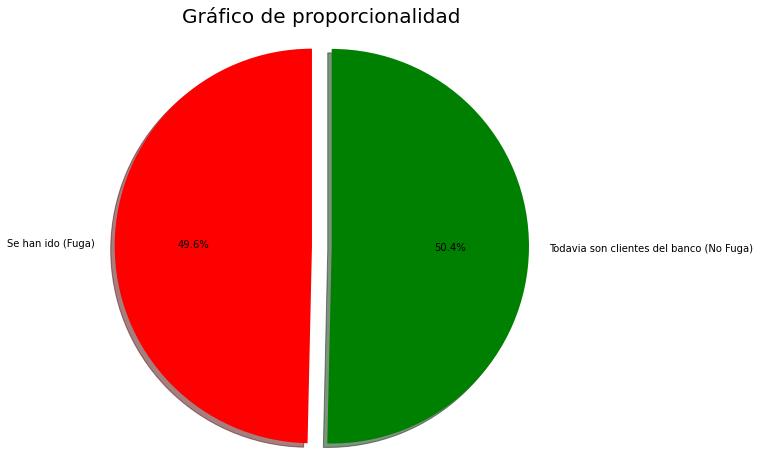

In [ ]:
# Verificamos si el dataset esta balanceado y mostramos un grafico de proporcionalidad
labels = 'Se han ido (Fuga)', 'Todavia son clientes del banco (No Fuga)'
sizes = [df.FUGA[df['FUGA']==1].count(),df.FUGA[df['FUGA']==0].count()] 
explode = (0, 0.1)
color=['red','green']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Gráfico de proporcionalidad", size = 20)
plt.show()

In [ ]:
# Mostramos Datos estadisticos
df.describe()

Out[24]:

,GENERO,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
count,2256.000000,2.256000e+03,2256.000000,2256.000000,2256.000000,2.256000e+03,2.256000e+03,2.256000e+03,2.256000e+03,2256.000000,2256.000000,2256.000000,2256.000000,2.256000e+03,2256.000000,2256.000000
mean,0.605496,8.584164e+05,43.575355,68.467199,107.530585,1.531012e+05,2.718225e+05,1.047116e+05,1.916634e+05,571.235372,3571.149823,1968.808954,1.253546,3.468351e+06,0.207004,0.496454
std,0.488852,1.387440e+06,8.875917,40.140902,84.251639,4.983560e+05,4.002192e+05,8.778449e+05,6.756635e+05,1082.404382,8966.661225,9948.906096,0.753696,2.287078e+06,0.405248,0.500098
min,0.000000,1.760000e+02,-50.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,0.000000,0.000000
25%,0.000000,1.013105e+05,39.000000,31.000000,80.000000,0.000000e+00,1.795550e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06,0.000000,0.000000
50%,1.000000,3.725730e+05,44.000000,56.000000,90.000000,0.000000e+00,1.363470e+05,0.000000e+00,5.502000e+03,146.500000,0.000000,58.500000,1.000000,2.600000e+06,0.000000,0.000000
75%,1.000000,8.306768e+05,50.000000,92.000000,118.000000,0.000000e+00,3.739510e+05,0.000000e+00,1.761538e+05,636.250000,1433.000000,500.250000,2.000000,4.800000e+06,0.000000,1.000000
max,1.000000,8.454317e+06,130.000000,155.000000,516.000000,9.458161e+06,5.495534e+06,1.839696e+07,2.063461e+07,11187.000000,88837.000000,249652.000000,3.000000,8.000000e+06,1.000000,1.000000


In [ ]:
# Podemos generar una nueva columna (DEUDA_TOTAL) con la suma de las deudas por registro
mesesdeudas = ['D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio','D_Agosto','D_Septiembre']
df['DEUDA_TOTAL'] = df[mesesdeudas].sum(axis=1)

In [ ]:
# Podemos generar una nueva columna (PROM_MONTO_RENTA) con el promedio entre el monto preaprobado y la renta del cliente
df['PROM_MONTO_RENTA'] = df['MONTO']/df['RENTA']

In [ ]:
# Como vemos el valor de la cantidad de variables incremento de 19 a 21 con la nueva columna DEUDA_TOTAL
df.shape

Out[27]: (2256, 21)

In [ ]:
#Vemos la muestra de los primeros 10 valores para observar el campo Deuda Total como quedo
df.head(10)

Out[28]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,PROM_MONTO_RENTA
0,1,746476,39.0,MED,CAS,68,213,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,0,0,483865,2.679256
1,0,11901,49.0,MED,VIU,16,89,SANTIAGO,0,0,0,0,48,0,0,1,7500000,1,0,48,630.199143
2,1,1651421,39.0,TEC,CAS,90,16,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,0,0,633906,4.844313
3,0,638969,36.0,UNV,CAS,85,115,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,0,0,204322,4.069055
4,1,860113,44.0,TEC,CAS,45,80,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,0,0,86326,7.440883
5,1,329463,40.0,TEC,CAS,53,92,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,0,1,200459,23.371365
6,1,28732,45.0,UNV,CAS,55,90,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,0,1,1111277,100.932758
7,0,11563,41.0,TEC,SOL,47,112,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,1,0,667132,181.613768
8,0,3044549,33.0,MED,CAS,22,1,ARICA,0,102078,0,0,44,0,0,1,1600000,0,0,102122,0.525529
9,0,3632707,39.0,MED,VIU,27,89,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,0,0,610326,0.770775


In [ ]:
# Toca revisar los valores de la edad para verificar valores atipicos o outlayers que pudieran comprometer el entrenamiento
# Verificamos si hay registros de clientes mayores de 90 años
df.loc[df['EDAD'] > 90]

Out[29]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,PROM_MONTO_RENTA
583,1,3976014,115.0,UNV,CAS,55,90,SANTIAGO,0,0,0,0,148,0,0,1,1800000,0,1,148,0.452715
1480,1,130582,130.0,UNV,CAS,31,119,SANTIAGO,0,1239039,0,952369,140,0,1075,2,1100000,0,1,2192623,8.423826
1797,1,647536,99.0,MED,CAS,122,97,SANTIAGO,0,169828,0,274195,450,4286,206,2,1800000,0,1,448965,2.779768


In [ ]:
# Como existen valores atipicos procedemos a actualizarlos con la moda de la
# Edad y volvemos a verificar observando que ya no existen dichos valores
moda = df['EDAD'].mode()
df.loc[df['EDAD'] > 90, 'EDAD'] = moda[0]
df.loc[df['EDAD'] > 90]

Out[30]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,PROM_MONTO_RENTA


In [ ]:
# Verificamos si hay registros de clientes menores de edad
df.loc[df['EDAD'] < 18]

Out[31]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,PROM_MONTO_RENTA
1283,1,482564,-21.0,UNV,SEP,122,89,SANTIAGO,0,24497,0,11561,20,0,0,1,3400000,0,1,36078,7.045698
1338,1,15086,-34.0,BAS,CAS,55,90,SANTIAGO,392608,1673,0,268995,592,0,10445,1,900000,0,1,674313,59.657961
1710,1,633982,-50.0,TEC,SOL,15,513,CON-CON,0,210886,0,0,9,8921,61,1,1900000,0,0,219877,2.996931


In [ ]:
# Se actualiza la Edad a todos los registros cuyos valores sean menores a 18
# Incluye valores negativos
moda = df['EDAD'].mode()
df.loc[df['EDAD'] < 18, 'EDAD'] = moda[0]
df.loc[df['EDAD'] < 18]

Out[32]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,PROM_MONTO_RENTA


In [ ]:
#Indentificamos las variables continuas de mayor diferencia con respecto a las demas variables para aplicar el logaritmo de cada una de ellas
df.head(10)

Out[33]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,PROM_MONTO_RENTA
0,1,746476,39.0,MED,CAS,68,213,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,0,0,483865,2.679256
1,0,11901,49.0,MED,VIU,16,89,SANTIAGO,0,0,0,0,48,0,0,1,7500000,1,0,48,630.199143
2,1,1651421,39.0,TEC,CAS,90,16,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,0,0,633906,4.844313
3,0,638969,36.0,UNV,CAS,85,115,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,0,0,204322,4.069055
4,1,860113,44.0,TEC,CAS,45,80,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,0,0,86326,7.440883
5,1,329463,40.0,TEC,CAS,53,92,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,0,1,200459,23.371365
6,1,28732,45.0,UNV,CAS,55,90,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,0,1,1111277,100.932758
7,0,11563,41.0,TEC,SOL,47,112,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,1,0,667132,181.613768
8,0,3044549,33.0,MED,CAS,22,1,ARICA,0,102078,0,0,44,0,0,1,1600000,0,0,102122,0.525529
9,0,3632707,39.0,MED,VIU,27,89,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,0,0,610326,0.770775


In [ ]:
# Analizaremos las variables con la funcion - Test Kolmogorov-Smirnov:
# Computa la distribución empirica acumulada (ECDF por sus siglas en ingles) de las variables continuas
from scipy import stats

def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x,y

def plot_kolmogorov(sample1, sample2, variable_name='', alpha=0.05):
    # obtenemos la ECDF para cada muestra y las ordenamos
    x1,y1 = ecdf(sample1)
    x2,y2 = ecdf(sample2)
    # plot
    plt.figure(figsize=(9, 6))
    sn.lineplot(x=x1, y=y1, color='red')
    sn.lineplot(x=x2, y=y2, color='blue')
    # test
    print(stats.ks_2samp(sample1, sample2))
    
    stat, p_val = stats.ks_2samp(sample1, sample2)
    # interpretamos el p-value
    #print(f"p-value: {round(p_val,4)} | alpha: {alpha}")

    if p_val < alpha:
        print('Las distribuciones son independientes (Rechaza Hipótesis Nula) | Existe relación entre las varibles (Considemos la variable)')
    else:
        print('Las distribuciones son dependientes (Acepta Hipótesis Nula) | No existe relación entre las varibles (Desechamos la variable)')
        plt.ylabel("Cumulative Distribution Function")
        plt.xlabel(variable_name)
        plt.show()

def sub_plot_kolmogorov(sample1, sample2, variable_name='', axarr=[], pos=0, alpha=0.05):
    x1,y1 = ecdf(sample1)
    x2,y2 = ecdf(sample2)
    
    plt.figure(figsize=(9, 6))
    sn.lineplot(x=x1, y=y1, color='red', ax=axarr[pos][2])
    sn.lineplot(x=x2, y=y2, color='blue', ax=axarr[pos][2])
    # test
    #print(stats.ks_2samp(sample1, sample2))
    
    stat, p_val = stats.ks_2samp(sample1, sample2)
    # interpretamos el p-value
    #print(f"p-value: {round(p_val,4)} | alpha: {alpha}")
    
    if p_val < alpha:
        axarr[pos][2].set_xlabel('{} (Rechaza Hipótesis Nula) | (Consideramos la variable {})'.format(stats.ks_2samp(sample1, sample2)[1], variable_name))
    else:
        axarr[pos][2].set_xlabel('{} (Acepta Hipótesis Nula) | (Desechamos la variable {})'.format(stats.ks_2samp(sample1, sample2)[1], variable_name))
        
    

In [ ]:
np.random.seed(461)
# Variables continuas itentificadas para aplicar logaritmos.
var_continuas_log = ['RENTA','D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio', 'D_Agosto', 'D_Septiembre', 'MONTO', 'DEUDA_TOTAL', 'PROM_MONTO_RENTA']

for column_log in var_continuas_log:
    print(f'logaritmo para {column_log}')
    df['LOG_{}'.format(column_log)] = np.log(df[column_log]+1) # agregamos el 1 para evitar indeterminar el logaritmo


logaritmo para RENTA
logaritmo para D_Marzo
logaritmo para D_Abril
logaritmo para D_Mayo
logaritmo para D_Junio
logaritmo para D_Julio
logaritmo para D_Agosto
logaritmo para D_Septiembre
logaritmo para MONTO
logaritmo para DEUDA_TOTAL
logaritmo para PROM_MONTO_RENTA

In [ ]:
df.head(10)

Out[36]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL,PROM_MONTO_RENTA,LOG_RENTA,LOG_D_Marzo,LOG_D_Abril,LOG_D_Mayo,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,LOG_PROM_MONTO_RENTA
0,1,746476,39.0,MED,CAS,68,213,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,0,0,483865,2.679256,13.523120,0.000000,10.553022,0.0,12.981624,7.477038,9.117238,5.831882,14.508658,13.089563,1.302710
1,0,11901,49.0,MED,VIU,16,89,SANTIAGO,0,0,0,0,48,0,0,1,7500000,1,0,48,630.199143,9.384462,0.000000,0.000000,0.0,0.000000,3.891820,0.000000,0.000000,15.830414,3.891820,6.447621
2,1,1651421,39.0,TEC,CAS,90,16,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,0,0,633906,4.844313,14.317147,0.000000,13.311611,0.0,0.000000,5.780744,10.184523,7.981392,15.894952,13.359658,1.765469
3,0,638969,36.0,UNV,CAS,85,115,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,0,0,204322,4.069055,13.367613,0.000000,8.542081,0.0,12.201055,4.553877,0.000000,4.663439,14.771022,12.227457,1.623154
4,1,860113,44.0,TEC,CAS,45,80,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,0,0,86326,7.440883,13.664820,0.000000,9.388235,0.0,11.211280,5.010635,0.000000,5.609472,15.671809,11.365898,2.133087
5,1,329463,40.0,TEC,CAS,53,92,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,0,1,200459,23.371365,12.705222,0.000000,12.141742,0.0,9.393412,6.464588,4.779123,5.043425,15.856731,12.208370,3.193409
6,1,28732,45.0,UNV,CAS,55,90,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,0,1,1111277,100.932758,10.265802,13.235665,13.185727,0.0,0.000000,7.289611,9.655090,7.329094,14.880222,13.921021,4.624313
7,0,11563,41.0,TEC,SOL,47,112,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,1,0,667132,181.613768,9.355652,0.000000,11.858768,0.0,13.171774,2.639057,0.000000,6.169611,14.557448,13.410745,5.207373
8,0,3044549,33.0,MED,CAS,22,1,ARICA,0,102078,0,0,44,0,0,1,1600000,0,0,102122,0.525529,14.928864,0.000000,11.533502,0.0,0.000000,3.806662,0.000000,0.000000,14.285515,11.533933,0.422341
9,0,3632707,39.0,MED,VIU,27,89,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,0,0,610326,0.770775,15.105489,0.000000,11.999411,0.0,13.007843,6.763885,0.000000,6.811244,14.845130,13.321750,0.571417


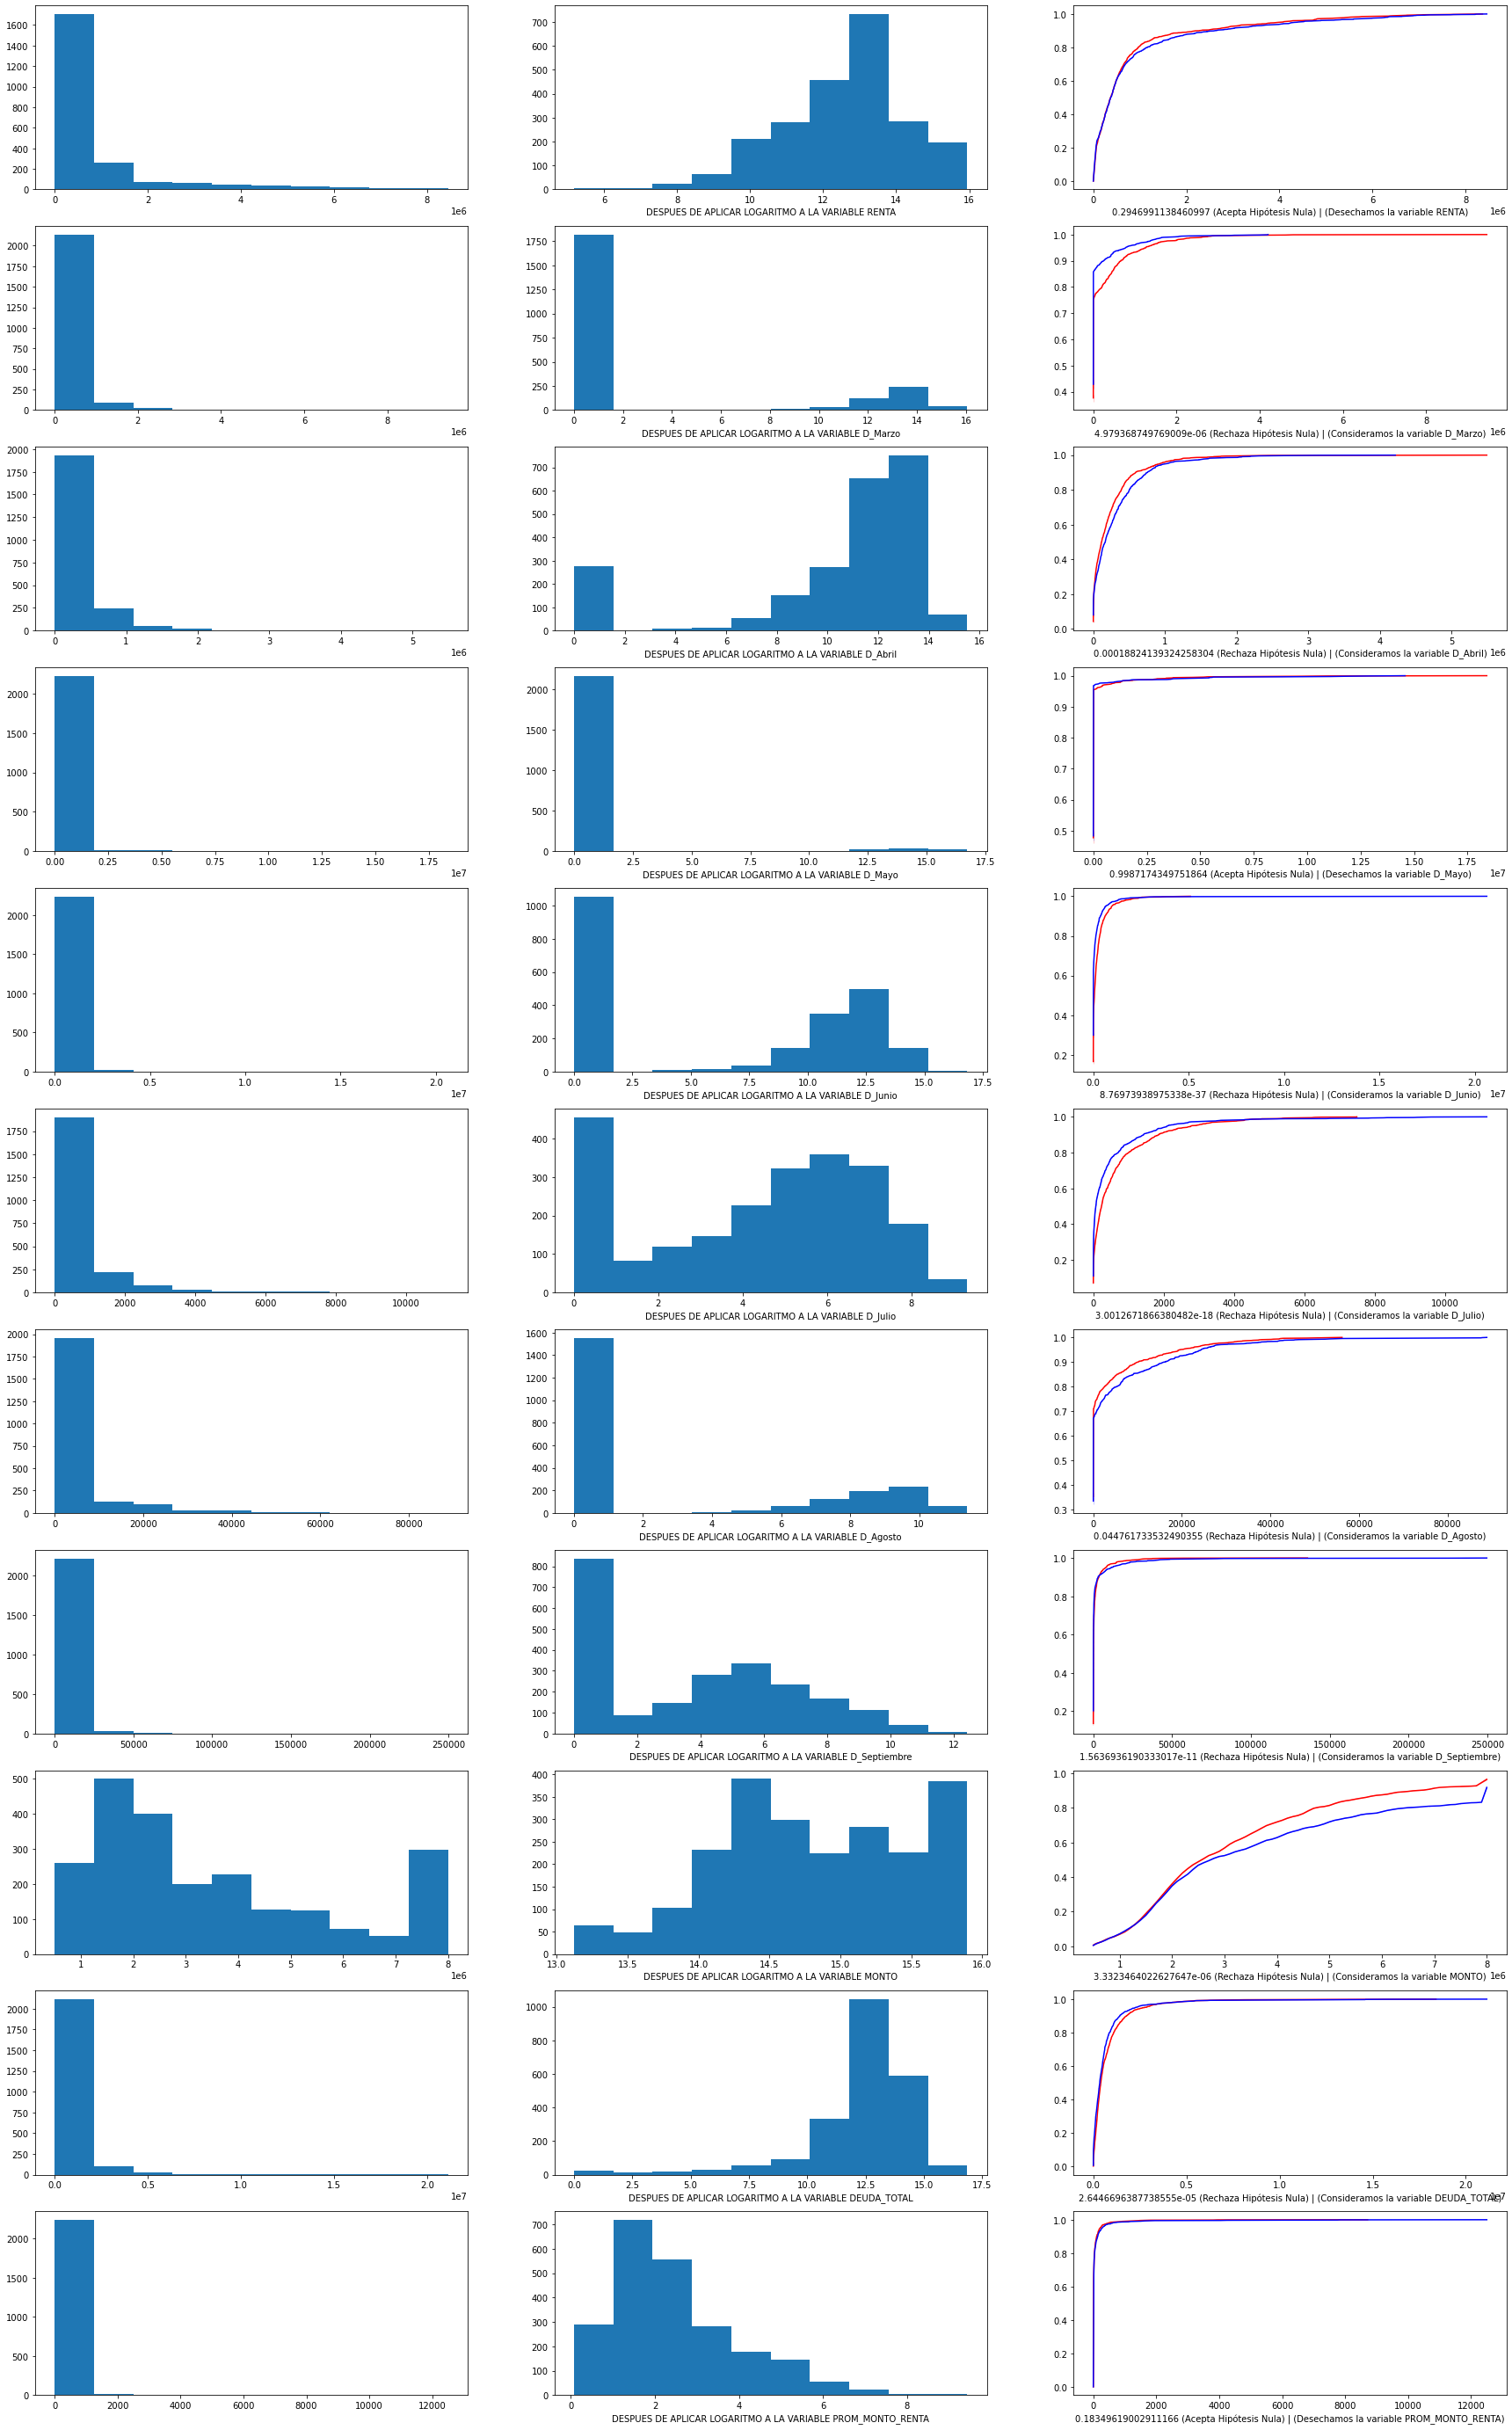

In [ ]:
np.random.seed(461)
# Comenzamos con el analisis de variables categoricas para verificar su impacto con respecto a la variable objetivo.
fig, axarr = plt.subplots(len(var_continuas_log),3, figsize=(30, 50))
j = 0
for column_log in var_continuas_log:
    axarr[j][0].hist(df[column_log])
    axarr[j][1].hist(df['LOG_{}'.format(column_log)])
    axarr[j][1].set_xlabel('DESPUES DE APLICAR LOGARITMO A LA VARIABLE {}'.format(column_log))
    sub_plot_kolmogorov(df[df['FUGA']==1][column_log].values, df[df['FUGA']==0][column_log].values, column_log, axarr, j)
    j = j+1

plt.show()

In [ ]:
# Despues de analizar las variables continuas con el metodo kolmovorov consideramos
# las variables aceptadas y rechazadas de tal forma que podamos descartar las rechazadas.
variables_descartadas = ['LOG_RENTA','LOG_D_Mayo','LOG_PROM_MONTO_RENTA']
df.drop(variables_descartadas,axis='columns',inplace=True)

# Eliminamos las variables origen a las que se le aplico el Logaritmo
df.drop(var_continuas_log,axis='columns',inplace=True)

df.head(10)


Out[38]:

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,SEGURO,FUGA,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL
0,1,39.0,MED,CAS,68,213,LOS ANGELES,2,0,0,0.000000,10.553022,12.981624,7.477038,9.117238,5.831882,14.508658,13.089563
1,0,49.0,MED,VIU,16,89,SANTIAGO,1,1,0,0.000000,0.000000,0.000000,3.891820,0.000000,0.000000,15.830414,3.891820
2,1,39.0,TEC,CAS,90,16,ANTOFAGASTA,1,0,0,0.000000,13.311611,0.000000,5.780744,10.184523,7.981392,15.894952,13.359658
3,0,36.0,UNV,CAS,85,115,SANTIAGO,1,0,0,0.000000,8.542081,12.201055,4.553877,0.000000,4.663439,14.771022,12.227457
4,1,44.0,TEC,CAS,45,80,SANTIAGO,1,0,0,0.000000,9.388235,11.211280,5.010635,0.000000,5.609472,15.671809,11.365898
5,1,40.0,TEC,CAS,53,92,SANTIAGO,2,0,1,0.000000,12.141742,9.393412,6.464588,4.779123,5.043425,15.856731,12.208370
6,1,45.0,UNV,CAS,55,90,SANTIAGO,1,0,1,13.235665,13.185727,0.000000,7.289611,9.655090,7.329094,14.880222,13.921021
7,0,41.0,TEC,SOL,47,112,SANTIAGO,1,1,0,0.000000,11.858768,13.171774,2.639057,0.000000,6.169611,14.557448,13.410745
8,0,33.0,MED,CAS,22,1,ARICA,1,0,0,0.000000,11.533502,0.000000,3.806662,0.000000,0.000000,14.285515,11.533933
9,0,39.0,MED,VIU,27,89,SANTIAGO,1,0,0,0.000000,11.999411,13.007843,6.763885,0.000000,6.811244,14.845130,13.321750


In [ ]:
# Ahora procedemos al analisis de las variables categoricas con el metodo Chi2
from scipy.stats import chi2_contingency

def analisis_matriz_contingencia_count(sample1, sample2, variable_name='', alpha=0.05):
    contigency = pd.crosstab(sample1, sample2, margins=True, margins_name='Total') 
    esperados = pd.DataFrame(contigency)
    return esperados

def analisis_matriz_contingencia(sample1, sample2, variable_name='', alpha=0.05):
    contigency = pd.crosstab(sample1, sample2) 
    print(contigency)
    print()
    return contigency

def analisi_chi2(sample1, sample2, variable_name='', alpha=0.05):
    contigency = pd.crosstab(sample1, sample2) 
    stats, p_val, dof, expected = chi2_contingency(contigency)
    
    if p_val < alpha:
        print('{} (Rechaza Hipótesis Nula) | (Consideramos la variable {}  estadístico: {})'.format(round(p_val,4), variable_name, round(stats,3)))
    else:
        print('{} (Acepta Hipótesis Nula) | (Desechamos la variable {}  estadístico: {})'.format(round(p_val,4), variable_name, round(stats,3)))
    

In [ ]:
# Dentro de las variables categoricas existen tres de ellas que vamos a aplicarle un tratamiento especial para reducir la cantidad existente y minimizar los sesgos por dispercion que pudieran existir.
# Esta variables son CIUDAD, COD_COM Y COD_OFIC tomando en cuenta los valores mas tipicos y agrupando el resto como OTROS.
# ciudades = df['CIUDAD'].groupby(df['CIUDAD']).agg({'count'}).sort_values(by='count', ascending=False)
# ciudades.head(20)

In [ ]:
df_c = df.copy()
ciudad= analisis_matriz_contingencia_count(df_c['CIUDAD'], df_c['FUGA'], 'CIUDAD')
ciudad.sort_values(by='Total', ascending=False).head(10)

Out[41]:

FUGA,0,1,Total
CIUDAD,,,
Total,1136,1120,2256
SANTIAGO,585,781,1366
ARICA,9,224,233
CONCEPCION,37,112,149
ANTOFAGASTA,47,0,47
VINA DEL MAR,41,0,41
CALAMA,23,0,23
IQUIQUE,22,0,22
TEMUCO,22,0,22


In [ ]:
# De acuerdo con los datos observados anteriormente podemos ver que la agrupacion optima considerada son: SANTIAGO, ARICA, CONCEPCION, y el resto como OTROS
ciudades_elegidas = ['SANTIAGO', 'ARICA', 'CONCEPCION']
df.loc[~df['CIUDAD'].isin(ciudades_elegidas), 'CIUDAD'] = 'OTROS'
df_cp = df.copy()

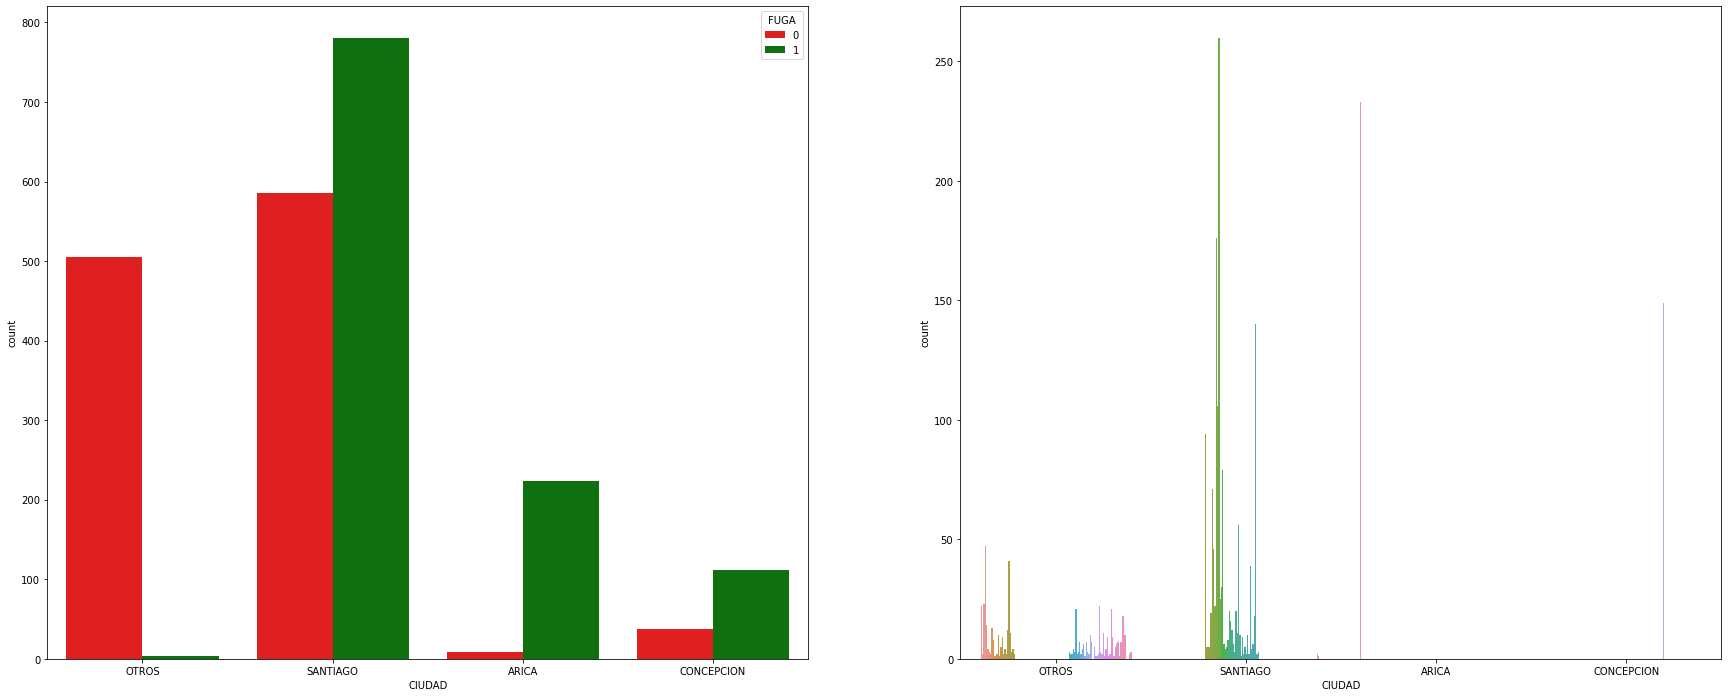

In [ ]:
# Comenzamos con el analisis de variables categoricas para verificar su impacto con respecto a la variable objetivo.
color=['red','green']
fig, axarr = plt.subplots(1,2, figsize=(30, 12))
sn.countplot(x='CIUDAD', hue = 'FUGA', data = df_cp, ax=axarr[0], palette=color)
sn.countplot(x='CIUDAD', hue = 'COD_COM', data = df_cp, ax=axarr[1])
axarr[1].get_legend().remove()

In [ ]:
# Ejecutamos dummies a la variable Ciudad para crear las variables por separados
df = pd.get_dummies(data=df,columns=['CIUDAD'])
df.sample(10)

Out[44]:

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,M_MOROSO,SEGURO,FUGA,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,CIUDAD_ARICA,CIUDAD_CONCEPCION,CIUDAD_OTROS,CIUDAD_SANTIAGO
2254,1,50.0,UNV,CAS,138,1,2,1,1,0.000000,13.020448,13.142386,6.131226,0.0,4.564348,15.009433,13.776996,1,0,0,0
1764,1,41.0,TEC,CAS,17,80,1,0,0,0.000000,12.330725,0.000000,0.693147,0.0,0.000000,14.346139,12.330730,0,0,0,1
1462,1,55.0,UNV,CAS,31,119,1,1,1,13.914802,11.539246,12.578357,7.421776,0.0,6.077642,15.319588,14.220554,0,0,0,1
1998,1,40.0,UNV,CAS,55,90,2,0,1,14.147278,11.070101,12.845503,7.934872,0.0,4.672829,14.220976,14.425073,0,0,0,1
2134,1,44.0,TEC,SEP,45,80,1,0,0,0.000000,10.445754,13.255339,5.446737,0.0,6.546785,15.671809,13.315353,0,0,0,1
718,0,36.0,TEC,VIU,96,88,1,0,0,0.000000,12.583539,0.000000,7.769379,0.0,4.762174,15.297115,12.592012,0,0,0,1
314,1,51.0,UNV,SOL,48,98,1,1,1,10.511785,12.356121,12.229965,6.820016,0.0,4.543295,14.808763,13.070999,0,0,0,1
1455,0,40.0,TEC,SOL,139,86,1,1,0,0.000000,9.749579,9.475163,3.465736,0.0,1.386294,15.226498,10.315994,0,0,0,1
1846,0,40.0,TEC,VIU,151,226,3,1,0,0.000000,12.789226,0.000000,6.694562,0.0,0.000000,13.815512,12.791476,0,1,0,0
1908,1,64.0,TEC,CAS,18,118,2,0,0,0.000000,12.899260,11.406531,6.590301,0.0,0.000000,13.527830,13.103484,0,0,0,1


In [ ]:
np.random.seed(461)
ciudades_group = ['SANTIAGO', 'ARICA', 'CONCEPCION', 'OTROS']
for ciudad_col in ciudades_group:
    print(f'Matriz de contingencia {ciudad_col}')
    analisis_matriz_contingencia(df['CIUDAD_{}'.format(ciudad_col)], df['FUGA'], 'CIUDAD_{}'.format(ciudad_col))

Matriz de contingencia SANTIAGO
FUGA 0 1
CIUDAD_SANTIAGO 
0 551 339
1 585 781

Matriz de contingencia ARICA
FUGA 0 1
CIUDAD_ARICA 
0 1127 896
1 9 224

Matriz de contingencia CONCEPCION
FUGA 0 1
CIUDAD_CONCEPCION 
0 1099 1008
1 37 112

Matriz de contingencia OTROS
FUGA 0 1
CIUDAD_OTROS 
0 631 1117
1 505 3

In [ ]:
# Como podemos analizar de acuerdo a la aplicacion del Chi Cuadrado todas las variables de ciudad creadas 
# por dummies se pueden considerar para el entrenamiento de los modelos
np.random.seed(461)
ciudades_group = ['SANTIAGO', 'ARICA', 'CONCEPCION', 'OTROS']
for ciudad_col in ciudades_group:
    print(f'Chi Cuadrado {ciudad_col}')
    analisi_chi2(df['CIUDAD_{}'.format(ciudad_col)], df['FUGA'], 'CIUDAD_{}'.format(ciudad_col))

Chi Cuadrado SANTIAGO
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable CIUDAD_SANTIAGO estadístico: 77.751)
Chi Cuadrado ARICA
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable CIUDAD_ARICA estadístico: 222.596)
Chi Cuadrado CONCEPCION
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable CIUDAD_CONCEPCION estadístico: 40.485)
Chi Cuadrado OTROS
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable CIUDAD_OTROS estadístico: 628.583)

In [ ]:
# Como puede observarse mediante el analisis de chi cuadrado las siguientes 
# variables se pueden considerar para el dataset de entrenamiento
np.random.seed(461)
# Variables categoricas itentificadas para analisis con respecto a la Fuga.
var_categoricas_log =  ['GENERO', 'NIV_EDUC', 'E_CIVIL', 'SEGURO']

for column_log in var_categoricas_log:
    print(f'Matriz de contingencia {column_log}')
    analisis_matriz_contingencia(df[column_log], df['FUGA'], column_log)
    print(f'Chi Cuadrado {column_log}')
    analisi_chi2(df[column_log], df['FUGA'], column_log)
    print()
    

Matriz de contingencia GENERO
FUGA 0 1
GENERO 
0 714 176
1 422 944

Chi Cuadrado GENERO
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable GENERO estadístico: 522.635)

Matriz de contingencia NIV_EDUC
FUGA 0 1
NIV_EDUC 
BAS 7 4
EUN 12 0
MED 350 260
TEC 558 134
UNV 209 722

Chi Cuadrado NIV_EDUC
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable NIV_EDUC estadístico: 568.477)

Matriz de contingencia E_CIVIL
FUGA 0 1
E_CIVIL 
CAS 562 848
SEP 53 61
SOL 437 198
VIU 84 13

Chi Cuadrado E_CIVIL
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable E_CIVIL estadístico: 200.393)

Matriz de contingencia SEGURO
FUGA 0 1
SEGURO 
0 860 929
1 276 191

Chi Cuadrado SEGURO
0.0 (Rechaza Hipótesis Nula) | (Consideramos la variable SEGURO estadístico: 17.581)

Out[48]:

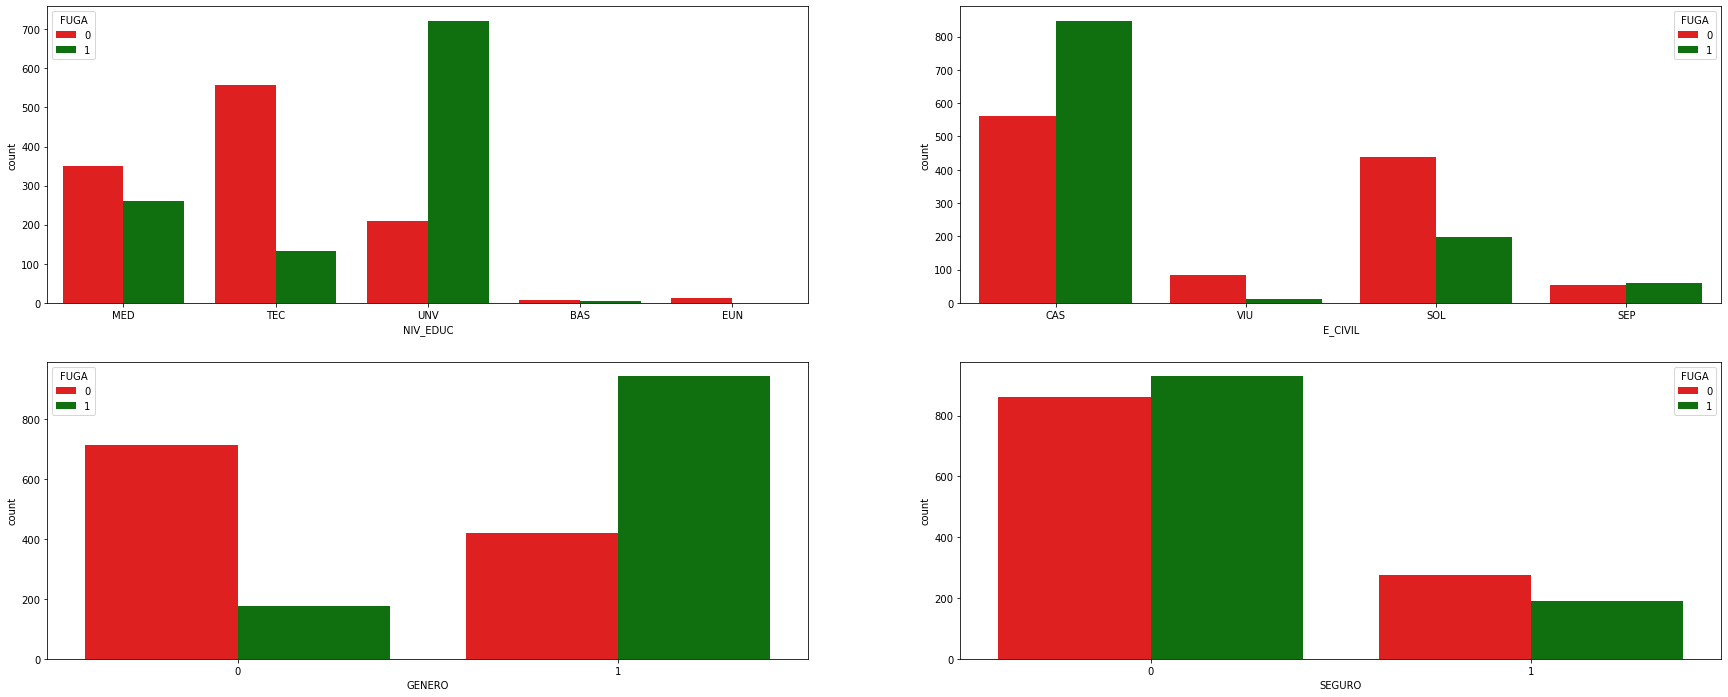

<matplotlib.axes._subplots.AxesSubplot at 0x7ff2d8a777c0>

In [ ]:
# Ya que todas las variavles categoricas fueron consideradas graficamos su valores
fig, axarr = plt.subplots(2, 2, figsize=(30, 12))
sn.countplot(x='NIV_EDUC', hue = 'FUGA', data = df, ax=axarr[0][0], palette=color)
sn.countplot(x='E_CIVIL', hue = 'FUGA', data = df, ax=axarr[0][1], palette=color)
sn.countplot(x='GENERO', hue = 'FUGA', data = df, ax=axarr[1][0], palette=color)
sn.countplot(x='SEGURO', hue = 'FUGA', data = df, ax=axarr[1][1], palette=color)

In [ ]:
# Dividimos los datos categoricos restante
df = pd.get_dummies(data=df,columns=['NIV_EDUC','E_CIVIL'])
df.shape

Out[49]: (2256, 28)

In [ ]:
df.head(10)

Out[50]:

,GENERO,EDAD,COD_OFI,COD_COM,M_MOROSO,SEGURO,FUGA,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,CIUDAD_ARICA,CIUDAD_CONCEPCION,CIUDAD_OTROS,CIUDAD_SANTIAGO,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU
0,1,39.0,68,213,2,0,0,0.000000,10.553022,12.981624,7.477038,9.117238,5.831882,14.508658,13.089563,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,49.0,16,89,1,1,0,0.000000,0.000000,0.000000,3.891820,0.000000,0.000000,15.830414,3.891820,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,39.0,90,16,1,0,0,0.000000,13.311611,0.000000,5.780744,10.184523,7.981392,15.894952,13.359658,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,36.0,85,115,1,0,0,0.000000,8.542081,12.201055,4.553877,0.000000,4.663439,14.771022,12.227457,0,0,0,1,0,0,0,0,1,1,0,0,0
4,1,44.0,45,80,1,0,0,0.000000,9.388235,11.211280,5.010635,0.000000,5.609472,15.671809,11.365898,0,0,0,1,0,0,0,1,0,1,0,0,0
5,1,40.0,53,92,2,0,1,0.000000,12.141742,9.393412,6.464588,4.779123,5.043425,15.856731,12.208370,0,0,0,1,0,0,0,1,0,1,0,0,0
6,1,45.0,55,90,1,0,1,13.235665,13.185727,0.000000,7.289611,9.655090,7.329094,14.880222,13.921021,0,0,0,1,0,0,0,0,1,1,0,0,0
7,0,41.0,47,112,1,1,0,0.000000,11.858768,13.171774,2.639057,0.000000,6.169611,14.557448,13.410745,0,0,0,1,0,0,0,1,0,0,0,1,0
8,0,33.0,22,1,1,0,0,0.000000,11.533502,0.000000,3.806662,0.000000,0.000000,14.285515,11.533933,1,0,0,0,0,0,1,0,0,1,0,0,0
9,0,39.0,27,89,1,0,0,0.000000,11.999411,13.007843,6.763885,0.000000,6.811244,14.845130,13.321750,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
# Separamos los datos de los clientes que Se fugaron y los que no
fugado = df[df['FUGA']==1]
noFugado = df[df['FUGA']==0]

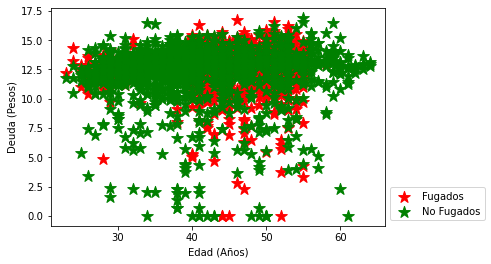

In [ ]:
# Obtenemos una gráfica de dispersión de la Edad de los clientes Fugados y No Fugados con respecto al Logaritmo Deuda Total
plt.scatter(fugado['EDAD'], fugado['LOG_DEUDA_TOTAL'], marker="*", s=150, color="red", label="Fugados")
plt.scatter(noFugado['EDAD'], noFugado['LOG_DEUDA_TOTAL'], marker="*", s=150, color="green", label="No Fugados")
plt.ylabel("Deuda (Pesos)")
plt.xlabel("Edad (Años)")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

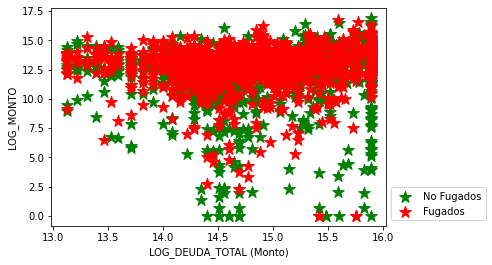

In [ ]:
# Obtenemos una gráfica de dispersión del Logaritmo del MONTO de los clientes Fugados y No Fugados con respecto a la Deuda Total
plt.scatter(noFugado['LOG_MONTO'], noFugado['LOG_DEUDA_TOTAL'], marker="*", s=150, color="green", label="No Fugados")
plt.scatter(fugado['LOG_MONTO'], fugado['LOG_DEUDA_TOTAL'], marker="*", s=150, color="red", label="Fugados")
plt.ylabel("LOG_MONTO")
plt.xlabel("LOG_DEUDA_TOTAL (Monto)")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

Out[54]:

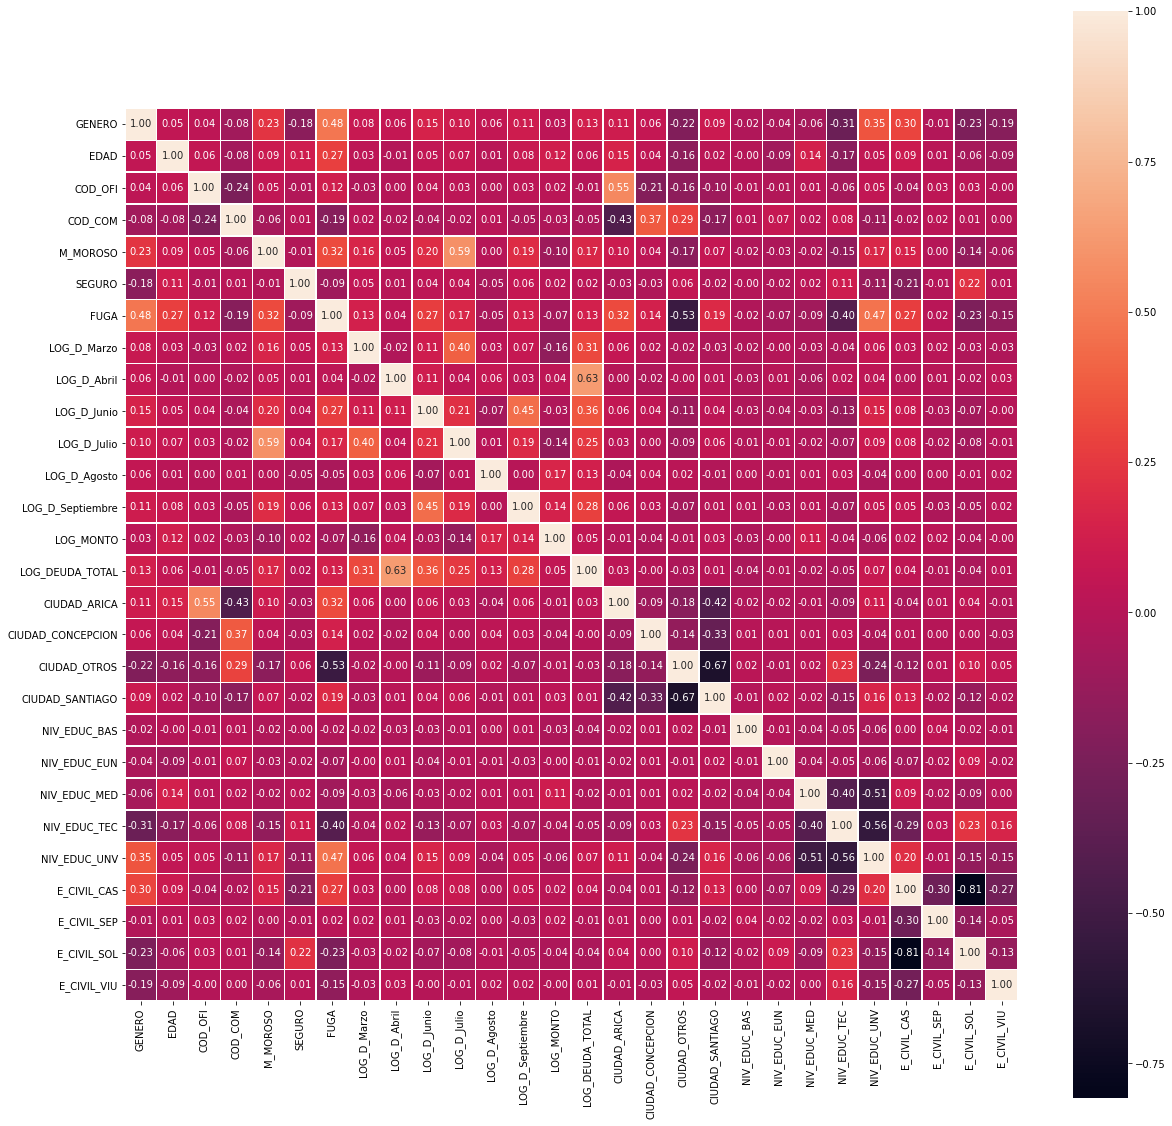

<matplotlib.axes._subplots.AxesSubplot at 0x7ff2d8f33460>

In [ ]:
# Mostramos el grafico de correlacion de variables para eliminar variables que en si mismas
# explique a otra y verificamos que estan balanceadas por lo que se pueden usar todas
plt.figure(figsize=(20,20))
correlation_mat = df.corr()
sn.heatmap(correlation_mat, annot = True, fmt=".2f", linewidths=.5, square = True)

In [ ]:
df3 = df.copy()
df3.head(10)

Out[55]:

,GENERO,EDAD,COD_OFI,COD_COM,M_MOROSO,SEGURO,FUGA,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,CIUDAD_ARICA,CIUDAD_CONCEPCION,CIUDAD_OTROS,CIUDAD_SANTIAGO,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU
0,1,39.0,68,213,2,0,0,0.000000,10.553022,12.981624,7.477038,9.117238,5.831882,14.508658,13.089563,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,49.0,16,89,1,1,0,0.000000,0.000000,0.000000,3.891820,0.000000,0.000000,15.830414,3.891820,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,39.0,90,16,1,0,0,0.000000,13.311611,0.000000,5.780744,10.184523,7.981392,15.894952,13.359658,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,36.0,85,115,1,0,0,0.000000,8.542081,12.201055,4.553877,0.000000,4.663439,14.771022,12.227457,0,0,0,1,0,0,0,0,1,1,0,0,0
4,1,44.0,45,80,1,0,0,0.000000,9.388235,11.211280,5.010635,0.000000,5.609472,15.671809,11.365898,0,0,0,1,0,0,0,1,0,1,0,0,0
5,1,40.0,53,92,2,0,1,0.000000,12.141742,9.393412,6.464588,4.779123,5.043425,15.856731,12.208370,0,0,0,1,0,0,0,1,0,1,0,0,0
6,1,45.0,55,90,1,0,1,13.235665,13.185727,0.000000,7.289611,9.655090,7.329094,14.880222,13.921021,0,0,0,1,0,0,0,0,1,1,0,0,0
7,0,41.0,47,112,1,1,0,0.000000,11.858768,13.171774,2.639057,0.000000,6.169611,14.557448,13.410745,0,0,0,1,0,0,0,1,0,0,0,1,0
8,0,33.0,22,1,1,0,0,0.000000,11.533502,0.000000,3.806662,0.000000,0.000000,14.285515,11.533933,1,0,0,0,0,0,1,0,0,1,0,0,0
9,0,39.0,27,89,1,0,0,0.000000,11.999411,13.007843,6.763885,0.000000,6.811244,14.845130,13.321750,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
df.shape

Out[56]: (2256, 28)

In [ ]:
np.random.seed(461)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['EDAD','COD_OFI','COD_COM','M_MOROSO','LOG_D_Marzo','LOG_D_Abril','LOG_D_Junio','LOG_D_Julio','LOG_D_Agosto','LOG_D_Septiembre','LOG_MONTO','LOG_DEUDA_TOTAL']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [ ]:
# Despues de ejecutar la tranformacion de los datos continuos podemos observar que el metodo utilizado establece un rango de 0 a 1 como base de escalamiento
df.head(10)

Out[58]:

,GENERO,EDAD,COD_OFI,COD_COM,M_MOROSO,SEGURO,FUGA,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,CIUDAD_ARICA,CIUDAD_CONCEPCION,CIUDAD_OTROS,CIUDAD_SANTIAGO,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU
0,1,0.390244,0.438710,0.411650,0.666667,0,0,0.000000,0.679987,0.770767,0.802034,0.800139,0.469260,0.500000,0.776091,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0.634146,0.103226,0.170874,0.333333,1,0,0.000000,0.000000,0.000000,0.417461,0.000000,0.000000,0.976723,0.230749,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0.390244,0.580645,0.029126,0.333333,0,0,0.000000,0.857737,0.000000,0.620079,0.893805,0.642219,1.000000,0.792105,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0.317073,0.548387,0.221359,0.333333,0,0,0.000000,0.550411,0.724422,0.488477,0.000000,0.375242,0.594628,0.724976,0,0,0,1,0,0,0,0,1,1,0,0,0
4,1,0.512195,0.290323,0.153398,0.333333,0,0,0.000000,0.604934,0.665655,0.537472,0.000000,0.451364,0.919518,0.673893,0,0,0,1,0,0,0,1,0,1,0,0,0
5,1,0.414634,0.341935,0.176699,0.666667,0,1,0.000000,0.782357,0.557721,0.693432,0.419421,0.405817,0.986215,0.723844,0,0,0,1,0,0,0,1,0,1,0,0,0
6,1,0.536585,0.354839,0.172816,0.333333,0,1,0.824016,0.849626,0.000000,0.781929,0.847341,0.589733,0.634013,0.825388,0,0,0,1,0,0,0,0,1,1,0,0,0
7,0,0.439024,0.303226,0.215534,0.333333,1,0,0.000000,0.764123,0.782057,0.283082,0.000000,0.496435,0.517597,0.795134,0,0,0,1,0,0,0,1,0,0,0,1,0
8,0,0.243902,0.141935,0.000000,0.333333,0,0,0.000000,0.743165,0.000000,0.408326,0.000000,0.000000,0.419518,0.683856,1,0,0,0,0,0,1,0,0,1,0,0,0
9,0,0.390244,0.174194,0.170874,0.333333,0,0,0.000000,0.773186,0.772323,0.725537,0.000000,0.548064,0.621357,0.789857,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
np.random.seed(461)
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
import tensorflow as tf

kfs = StratifiedKFold(n_splits=4)

def get_train_test_split(X, y, test_size=0.2):
    X_split_train, X_split_test, y_split_train, y_split_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_split_train, X_split_test, y_split_train, y_split_test

def get_score_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

def get_score_model_rnn(model, X_train, X_test, y_train, y_test, epochs=25):
    model.fit(X_train, y_train, epochs=epochs, validation_data = (X_test, y_test))
    return model.evaluate(X_test, y_test, verbose=1)[1]

def get_report_model(model, X_test, y_test):
    model_predict = model.predict(X_test)
    model_data = tf.math.confusion_matrix(labels=y_test,predictions=model_predict)
    plt.figure(figsize=(10,7))
    sn.heatmap(model_data, annot=True, fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    
    print(classification_report(y_test, model_predict))
    return True

def get_report_model_rnn(model, X_test, y_test, alpha= 0.5):
    model_predict = model.predict(X_test)
    
    y_predict = []
    for element in model_predict:
        if element > alpha:
            y_predict.append(1)
        else:
            y_predict.append(0)
            
    model_data = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
    plt.figure(figsize=(10,7))
    sn.heatmap(model_data, annot=True, fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    return True
    #print(classification_report(y_test, model_predict))
    
def eject_KFold_data(model, X, y, test_size=0.2, report=True):
    score_model = []
    X_split_train, X_split_test, y_split_train, y_split_test = get_train_test_split(X, y, test_size=test_size)
    
    for train_index, test_index in kfs.split(X_split_train, y_split_train):
        X_train, X_test, y_train, y_test = X_split_train.iloc[train_index], X_split_train.iloc[test_index], y_split_train.iloc[train_index], y_split_train.iloc[test_index]
        
        score_model.append(get_score_model(model, X_train, X_test, y_train, y_test))
        
    print('SCORES: [%s] : PROM: %.2f' % (score_model, np.mean(score_model)))
    print()
    if(report):
        get_report_model(model, X_split_test, y_split_test)
        
    return np.mean(score_model)

        
def eject_KFold_data_rnn(model, X, y, test_size=0.2, report=True, epochs=25):
    score_model = []
    X_split_train, X_split_test, y_split_train, y_split_test = get_train_test_split(X, y, test_size=test_size)
    
    for train_index, test_index in kfs.split(X_split_train, y_split_train):
        X_train, X_test, y_train, y_test = X_split_train.iloc[train_index], X_split_train.iloc[test_index], y_split_train.iloc[train_index], y_split_train.iloc[test_index]
        
        score_model.append(get_score_model_rnn(model, X_train, X_test, y_train, y_test, epochs=epochs))
        
    print('SCORES: [%s] : PROM: %.2f' % (score_model, np.mean(score_model)))
    print()
    if(report):
        get_report_model_rnn(model, X_split_test, y_split_test)
        
    return np.mean(score_model)

In [ ]:
#Separamos el dataframe de los datos de entrenamiento con respecto a la variable objetivo.
y = df['FUGA']
X = df.drop('FUGA', axis='columns')

SCORES: [[0.8758314855875832, 0.9046563192904656, 0.8869179600886918, 0.8758314855875832]] : PROM: 0.89

 precision recall f1-score support

 0 0.92 0.85 0.88 226
 1 0.86 0.93 0.89 226

 accuracy 0.89 452
 macro avg 0.89 0.89 0.89 452
weighted avg 0.89 0.89 0.89 452

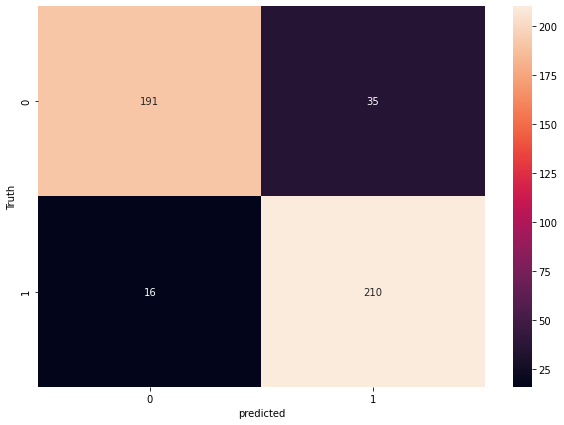

In [ ]:
# Modelo K Vecinos mas Cercanos
np.random.seed(461)
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=24)
accuracy_knn = eject_KFold_data(knn_classifier, X, y, report=True)

SCORES: [[0.8957871396895787, 0.9201773835920177, 0.926829268292683, 0.9090909090909091]] : PROM: 0.91

 precision recall f1-score support

 0 0.93 0.85 0.89 226
 1 0.87 0.94 0.90 226

 accuracy 0.90 452
 macro avg 0.90 0.90 0.90 452
weighted avg 0.90 0.90 0.90 452

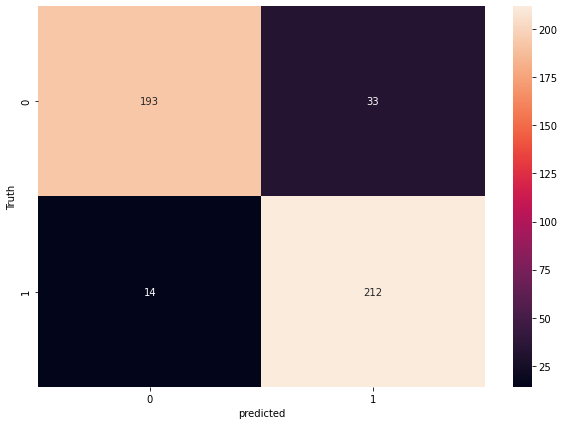

In [ ]:
# Modelo Arbol de Decision
np.random.seed(461)
from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
accuracy_tree = eject_KFold_data(tree_classifier, X, y, report=True)

SCORES: [[0.8669623059866962, 0.8980044345898004, 0.9002217294900222, 0.8980044345898004]] : PROM: 0.89

 precision recall f1-score support

 0 0.91 0.87 0.89 226
 1 0.87 0.92 0.89 226

 accuracy 0.89 452
 macro avg 0.89 0.89 0.89 452
weighted avg 0.89 0.89 0.89 452

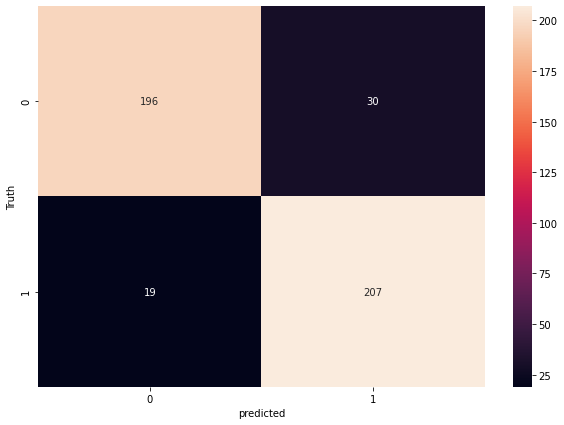

In [ ]:
# Modelo Regresion Logistica
np.random.seed(461)
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
accuracy_logistic = eject_KFold_data(log_classifier, X, y, report=True)

SCORES: [[0.8713968957871396, 0.8913525498891353, 0.8891352549889135, 0.8891352549889135]] : PROM: 0.89

 precision recall f1-score support

 0 0.92 0.85 0.88 226
 1 0.86 0.92 0.89 226

 accuracy 0.88 452
 macro avg 0.89 0.88 0.88 452
weighted avg 0.89 0.88 0.88 452

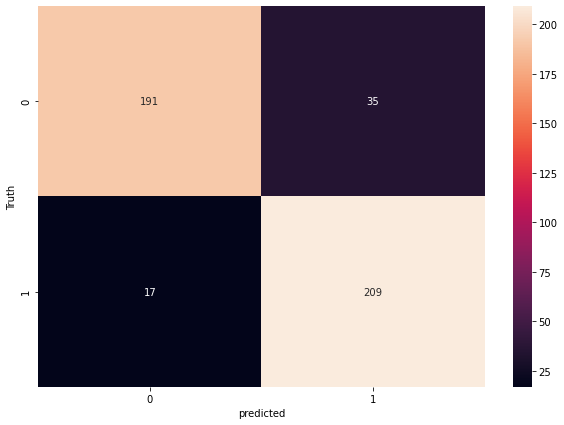

In [ ]:
# Modelo Maquina de Vectores de Soporte
np.random.seed(461)
from sklearn.svm import SVC

svc_lassifier = SVC(kernel='linear', C=0.025, random_state=7, probability=True)
accuracy_svclassifier = eject_KFold_data(svc_lassifier, X, y, report=True)

SCORES: [[0.729490022172949, 0.7893569844789357, 0.7760532150776053, 0.7450110864745011]] : PROM: 0.76

 precision recall f1-score support

 0 0.96 0.57 0.72 226
 1 0.69 0.98 0.81 226

 accuracy 0.77 452
 macro avg 0.83 0.77 0.76 452
weighted avg 0.83 0.77 0.76 452

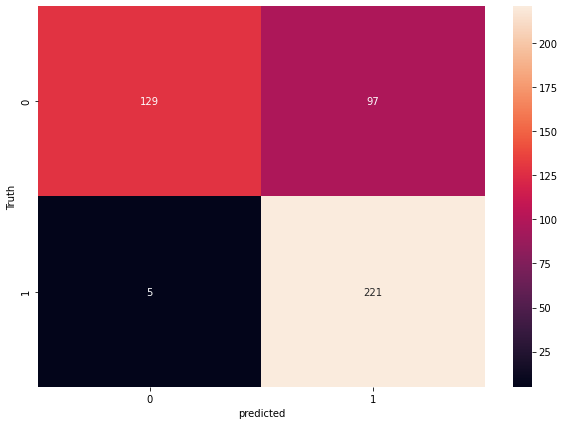

In [ ]:
# Modelo Gaussian Naive Bayes
np.random.seed(461)
from sklearn.naive_bayes import GaussianNB

NBC_lassifier = GaussianNB()
accuracy_NBClassifier = eject_KFold_data(NBC_lassifier, X, y, report=True)

SCORES: [[0.8669623059866962, 0.9002217294900222, 0.88470066518847, 0.88470066518847]] : PROM: 0.88

 precision recall f1-score support

 0 0.95 0.81 0.87 226
 1 0.83 0.96 0.89 226

 accuracy 0.88 452
 macro avg 0.89 0.88 0.88 452
weighted avg 0.89 0.88 0.88 452

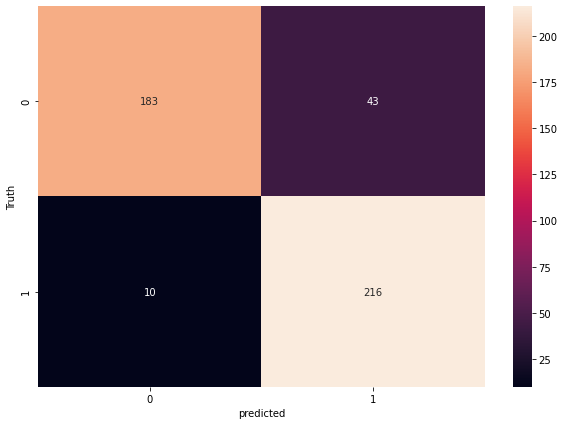

In [ ]:
# Modelo Stochastic Gradient Descent
np.random.seed(461)
from sklearn.linear_model import SGDClassifier

SGD_Classifier = SGDClassifier(loss='modified_huber',alpha=1e-3,class_weight='balanced')
accuracy_SGDclassifier = eject_KFold_data(SGD_Classifier, X, y, report=True)

SCORES: [[0.9113082039911308, 0.917960088691796, 0.9379157427937915, 0.926829268292683]] : PROM: 0.92

 precision recall f1-score support

 0 0.93 0.90 0.91 226
 1 0.90 0.93 0.92 226

 accuracy 0.91 452
 macro avg 0.91 0.91 0.91 452
weighted avg 0.91 0.91 0.91 452

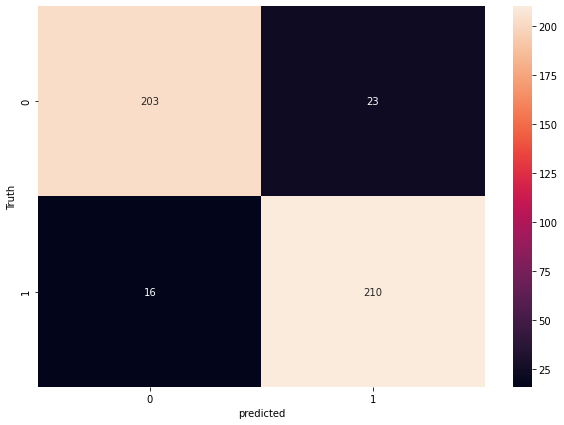

In [ ]:
# Modelo Random Forest Classifier
np.random.seed(461)
from sklearn.ensemble import RandomForestClassifier

RF_Classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10, random_state = 7)
accuracy_RFClassifier = eject_KFold_data(RF_Classifier, X, y, report=True)

Epoch 1/10
 1/43 [..............................] - ETA: 16s - loss: 0.6931 - accuracy: 0.812543/43 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.6785 - val_loss: 0.6896 - val_accuracy: 0.7273
Epoch 2/10
 1/43 [..............................] - ETA: 0s - loss: 0.6890 - accuracy: 0.750043/43 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.7812 - val_loss: 0.6650 - val_accuracy: 0.7583
Epoch 3/10
 1/43 [..............................] - ETA: 0s - loss: 0.6605 - accuracy: 0.843843/43 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.7894 - val_loss: 0.5972 - val_accuracy: 0.7716
Epoch 4/10
 1/43 [..............................] - ETA: 0s - loss: 0.5683 - accuracy: 0.781243/43 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.8256 - val_loss: 0.5036 - val_accuracy: 0.8404
Epoch 5/10
 1/43 [..............................] - ETA: 0s - loss: 0.5144 - accuracy: 0.906243/43 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8655 - val_loss: 0.4249 - val_accuracy: 0.8559
Epoch 6/10
 1/43 [..............................] - ETA: 0s - loss: 0.3308 - accuracy: 0.875043/43 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8721 - val_loss: 0.3753 - val_accuracy: 0.8559
Epoch 7/10
 1/43 [..............................] - ETA: 0s - loss: 0.2470 - accuracy: 0.968843/43 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8928 - val_loss: 0.3496 - val_accuracy: 0.8603
Epoch 8/10
 1/43 [..............................] - ETA: 0s - loss: 0.2300 - accuracy: 0.937543/43 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.8980 - val_loss: 0.3321 - val_accuracy: 0.8758
Epoch 9/10
 1/43 [..............................] - ETA: 0s - loss: 0.3876 - accuracy: 0.843843/43 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8973 - val_loss: 0.3245 - val_accuracy: 0.8758
Epoch 10/10
 1/43 [..............................] - ETA: 0s - loss: 0.1952 - accuracy: 0.968843/43 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8965 - val_loss: 0.3187 - val_accuracy: 0.8758
 1/15 [=>............................] - ETA: 0s - loss: 0.1887 - accuracy: 0.937515/15 [==============================] - 0s 613us/step - loss: 0.3187 - accuracy: 0.8758
Epoch 1/10
 1/43 [..............................] - ETA: 0s - loss: 0.1739 - accuracy: 0.937543/43 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8884 - val_loss: 0.2652 - val_accuracy: 0.9047
Epoch 2/10
 1/43 [..............................] - ETA: 0s - loss: 0.1411 - accuracy: 0.968843/43 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8906 - val_loss: 0.2565 - val_accuracy: 0.9024
Epoch 3/10
 1/43 [..............................] - ETA: 0s - loss: 0

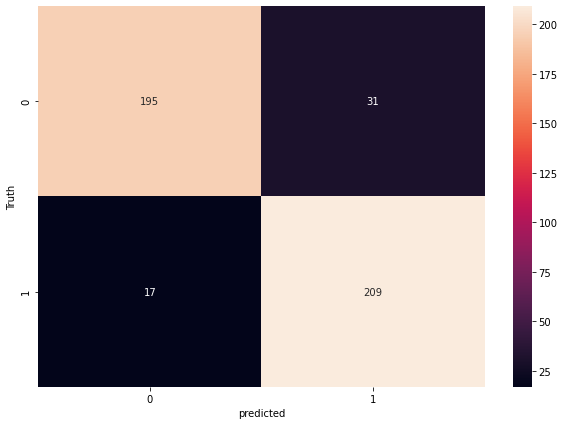

In [ ]:
# Modelo Redes Neuronales
np.random.seed(461)
redneuronal = tf.keras.Sequential([
    tf.keras.layers.Dense(16,  kernel_initializer = 'uniform', input_shape=(27,), activation='relu'),
    tf.keras.layers.Dense(4,  kernel_initializer = 'uniform', activation='relu'),
    tf.keras.layers.Dense(1,  kernel_initializer = 'uniform', activation='sigmoid'),
])
redneuronal.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

accuracy_rnn = eject_KFold_data_rnn(redneuronal, X, y, report=True, epochs=10)

In [ ]:
Model_Comparison = pd.DataFrame({
    'Model': [
                'K-Nearest Neighbor',
                'Decision Tree',
                'Logistic Regression',
                'Support Vector Machine', 
                'GaussianNB',
                'Stochastic Gradient Descent',
                'Random Forest',
                'Red Neuronal'
             ],
    'Score': [
                accuracy_knn,
                accuracy_tree,
                accuracy_logistic, 
                accuracy_svclassifier, 
                accuracy_NBClassifier,
                accuracy_SGDclassifier,
                accuracy_RFClassifier,
                accuracy_rnn
            ]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

Out[69]:

,Score,Model
0,0.923503,Random Forest
1,0.912971,Decision Tree
2,0.890798,Logistic Regression
3,0.890798,Red Neuronal
4,0.885809,K-Nearest Neighbor
5,0.885255,Support Vector Machine
6,0.884146,Stochastic Gradient Descent
7,0.759978,GaussianNB


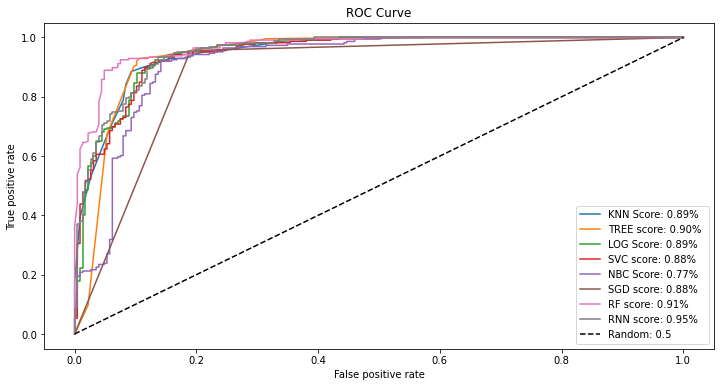

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

X_split_train, X_split_test, y_split_train, y_split_test = get_train_test_split(X, y, test_size=0.2)

auc_knn, fpr_knn, tpr_knn = get_auc_scores(y_split_test, knn_classifier.predict(X_split_test),knn_classifier.predict_proba(X_split_test)[:,1])
auc_tree, fpr_tree, tpr_tree = get_auc_scores(y_split_test, tree_classifier.predict(X_split_test),tree_classifier.predict_proba(X_split_test)[:,1])
auc_log, fpr_log, tpr_log = get_auc_scores(y_split_test, log_classifier.predict(X_split_test),log_classifier.predict_proba(X_split_test)[:,1])
auc_svc, fpr_svc, tpr_svc = get_auc_scores(y_split_test, svc_lassifier.predict(X_split_test),svc_lassifier.predict_proba(X_split_test)[:,1])
auc_nbc, fpr_nbc, tpr_nbc = get_auc_scores(y_split_test, NBC_lassifier.predict(X_split_test),NBC_lassifier.predict_proba(X_split_test)[:,1])
auc_sgd, fpr_sgd, tpr_sgd = get_auc_scores(y_split_test, SGD_Classifier.predict(X_split_test),SGD_Classifier.predict(X_split_test))
auc_rfc, fpr_rfc, tpr_rfc = get_auc_scores(y_split_test, RF_Classifier.predict(X_split_test),RF_Classifier.predict_proba(X_split_test)[:,1])
auc_rnn, fpr_rnn, tpr_rnn = get_auc_scores(y_split_test, redneuronal.predict(X_split_test),redneuronal.predict(X_split_test))


plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: {:.2f}% '.format(auc_knn))
plt.plot(fpr_tree, tpr_tree, label = 'TREE score: {:.2f}% '.format(auc_tree))
plt.plot(fpr_log, tpr_log, label = 'LOG Score: {:.2f}% '.format(auc_log))
plt.plot(fpr_svc, tpr_svc, label = 'SVC score: {:.2f}% '.format(auc_svc))
plt.plot(fpr_nbc, tpr_nbc, label = 'NBC Score: {:.2f}% '.format(auc_nbc))
plt.plot(fpr_sgd, tpr_sgd, label = 'SGD score: {:.2f}% '.format(auc_sgd))
plt.plot(fpr_rfc, tpr_rfc, label = 'RF score: {:.2f}% '.format(auc_rfc))
plt.plot(fpr_rnn, tpr_rnn, label = 'RNN score: {:.2f}% '.format(auc_rnn))

plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

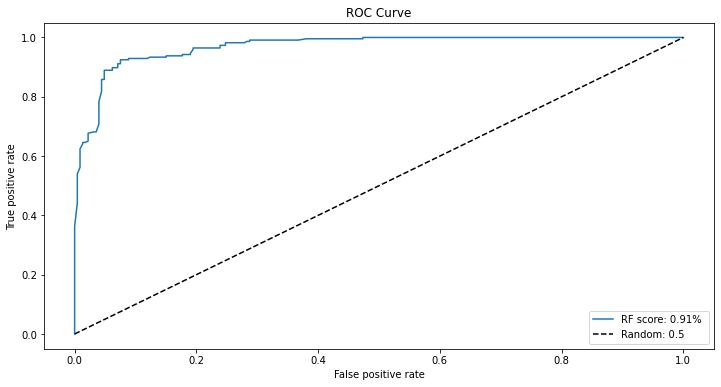

In [ ]:
# Como podemos observar el modelo con mejor ROC lo tiene el RandomForest por lo que se elige como modelo predictor principal
auc_rfc, fpr_rfc, tpr_rfc = get_auc_scores(y_split_test, RF_Classifier.predict(X_split_test),RF_Classifier.predict_proba(X_split_test)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_rfc, tpr_rfc, label = 'RF score: {:.2f}% '.format(auc_rfc))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [ ]:
#Validacion de modelos

In [ ]:
# Exportamos el archivo CSV de la base de datos
file_location = "/dbfs/mnt/hackathonsonda2021/VALIDACION_FORMATO.csv"
delimiter = ";"
df_val = pd.read_csv(file_location, delimiter=delimiter, encoding = "ISO-8859-1")
df_val.shape

Out[194]: (1200, 20)

In [ ]:
df_val.head()

Out[195]:

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,2295,M,457693,45,UNV,CAS,31,119,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,NO,NaN
1,2296,F,2258382,30,TEC,SOL,74,272,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,NO,NaN
2,2297,M,546190,51,UNV,CAS,138,1,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,SI,NaN
3,2298,F,424424,41,MED,SOL,138,80,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,NO,NaN
4,2299,M,6862726,42,MED,CAS,52,91,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,NO,NaN


In [ ]:
# Eliminamos las variables innecesarias
df_val.drop(["ID", 'FUGA'],axis='columns',inplace=True)
df_val.shape

Out[196]: (1200, 18)

In [ ]:
df_val.head()

Out[197]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO
0,M,457693,45,UNV,CAS,31,119,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,NO
1,F,2258382,30,TEC,SOL,74,272,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,NO
2,M,546190,51,UNV,CAS,138,1,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,SI
3,F,424424,41,MED,SOL,138,80,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,NO
4,M,6862726,42,MED,CAS,52,91,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,NO


In [ ]:
df_val.dtypes

Out[198]: GENERO object
RENTA object
EDAD int64
NIV_EDUC object
E_CIVIL object
COD_OFI int64
COD_COM object
CIUDAD object
D_Marzo int64
D_Abril int64
D_Mayo int64
D_Junio int64
D_Julio int64
D_Agosto int64
D_Septiembre int64
M_MOROSO float64
MONTO int64
SEGURO object
dtype: object

In [ ]:
#Eliminamos la columna sin nombrar que esta en el dataframe de validacion
#df_val = df_val.loc[:, ~df_val.columns.str.contains('^Unnamed')]

In [ ]:
# Separamos las columnas categoricas
col_type_objects_val = []
for column in df_val:
    if df_val[column].dtypes == 'object':
        col_type_objects_val.append(column)
col_type_objects_val

Out[199]: ['GENERO', 'RENTA', 'NIV_EDUC', 'E_CIVIL', 'COD_COM', 'CIUDAD', 'SEGURO']

In [ ]:
# Limpiamos los espacios en blanco en las columnas
for column in col_type_objects_val:
    df_val[column] = df_val[column].str.strip()
    print(f'{column} : {df_val[column].unique()} cant={df_val[column].nunique()}')

GENERO : ['M' 'F' nan] cant=2
RENTA : ['457693' '2258382' '546190' '424424' '6862726' '3886687' '1455' '726924'
 '106848' '1136817' '242578' '546344' '215333' '741118' '321156' '54502'
 '93628' '178452' '23230' '151622' '30485' '198841' '129320' '160046'
 '913011' '1504336' '2297287' '752156' '24586' '247041' '497133' '517968'
 '795436' '65392' '1321843' '110208' '910117' '36245' '189396' '101536'
 '1200733' '474138' '188606' '1581705' '1373197' '947855' '47965' '25330'
 '20497' '19852' '803008' '917414' '52043' '342778' '938246' '149524'
 '861796' '328872' '17817' '335661' '302760' '284796' '112515' '18227'
 '313214' '632418' '10786' '967910' '2844545' '514628' '76690' '156210'
 '116747' '110503' '619464' '501752' '527021' '502507' '593145' '268522'
 '331972' '72' '56185' '509412' '10502' '364932' '2341685' '110790'
 '586336' '1591133' '346461' '526845' '17340' '40048' '35225' '122249'
 '325481' '6216' '3484840' '508147' '537160' '3287056' '156128' '516047'
 '2389025' '48429' '411952' '43254' '4367380' '248437' '857241' '1048919'
 '786016' '822419' '1806119' '3340519' '90786' '130751' '1610852' '221218'
 '419233' '202' '45141' '825436' '30841' '9785' '519902' '398861' '11045'
 '50200' '3464' '464759' '11814' '402635' '809645' '169887' '2966475'
 '686881' '512010' '377193' '1195649' '1059501' '37339' '3530' '269171'
 '471870' '1639218' '23939' '9422141' '751424' '125830' '42948' '722398'
 '208515' '450956' '729104' '319704' '423603' '199352' '37340' '48860'
 '2477444' '186118' '330248' '2542408' '39675' '1378434' '1016281'
 '255197' '5086551' '4374' '252403' '12041' '196794' '743849' '5914343'
 '2197364' '624062' '572883' '305187' '288302' '418679' '480865' '1454789'
 '12602' '236240' '244275' '1145664' '297591' '213082' '154200' '1308405'
 '1040949' '1368706' '164431' '1112186' '563012' '5754232' '450035'
 '2796638' '458849' '549158' '2072' '298786' '70688' '148233' '399297'
 '52995' '1121075' '254632' '1023546' '847516' '59073' '6149761' '341112'
 '3599' '210789' '131755' '361649' '8455' '779979' '134700' '90453'
 '46130' '489172' '620488' '11417' '143663' '154124' '422850' '39921'
 '4823835' '63102' '260550' '582788' '925647' '2261687' '71123' '1055754'
 '88971' '542764' '67895' '667015' '571434' '492246' '605364' '1704661'
 '13520' '263009' '141807' '480219' '351215' '59904' '362161' '489687'
 '187984' '8080' '1904543' '513376' '324796' '393576' '35540' '34075'
 '38503' '144916' '55498' '599862' '12190' '357022' '690314' '316200'
 '405747' '118550' '1159148' '902031' '8150' '53475' '3743501' '11432'
 '643128' '4469661' '26048' '447067' '373003' '4469253' '998257' '3652650'
 '6366671' '2867' '3475166' '17516' '415763' '177772' '621866' '673583'
 '252673' '177126' '1080235' '486352' '701827' '12433' '484823' '581381'
 '2446218' '532919' '623842' '460114' '494296' '581915' '56053' '128410'
 '5361419' '1804902' '504244' '277206' '140436' '431108' '764719' '278907'
 '17551' '863233' '253934' '395' '1838178' '454378' '679' '137215'
 '328598' '989525' '82385' '35106' '68741' '7769' '117778' '77783'
 '390497' '1297053' '265266' '657637' '1849257' '148017' '262897' '67061'
 '11677' '8148796' '123222' '42932' '37910' '5391231' '1365343' '799851'
 '3548945' '2840' '134124' '247169' '812179' '69749' '4522' '2051192'
 '621417' '45967' '271849' '117465' '60004' '1351132' '65159' '136323'
 '5123' '73938' '871577' '458281' '679177' '2439576' '1994216' '662016'
 '853725' '24432' '8452507' '29056' '229831' '151643' '435788' '120036'
 '1203211' '4413220' '105958' '586145' '5147495' '351199' '10397' '59625'
 '4692333' '1035136' '62659' '198763' '3368972' '26936' '3443967' '14601'
 '10350' '58493' '3103353' '15611' '298096' '638576' '251680' '414448'
 '257616' '1545849' '80942' '410311' '3813514' '34511' '812809' '167451'
 '43938' '719843' '2331906' '367403' '484801' '2000784' '206933' '192853'
 '373657' '251428' '338664' '462228' '459298' '2697816' '405306' '29763'
 '673755' '266466' '221597' '102016' '437563' '21417' '3385731' '12702'
 '4833

In [ ]:
# Al revisar los valores encontramos valores con espacios,
# los cuales convertiremos en None para poder calcular el % de registros posibles de desechar
for column in col_type_objects_val:
    df_val[column].replace({'':None},inplace=True)

In [ ]:
# Contamos la cantidad de NaN y None totales en los registros
df_val.isnull().sum().sum()

Out[202]: 55

In [ ]:
# Calculamos el porcentaje de valores nulos del total de la muestra
na_ratio = (df_val.isnull().sum().sum() / len(df_val))*100
print("%.3f " % na_ratio)

4.583

In [ ]:
# Ya que la cantidad de registros con algún valor nulo es menos del 5%,
# procedemos a eliminar dichos registros
df_val = df_val.dropna()

In [ ]:
df_val.head(10)

Out[205]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO
0,M,457693,45,UNV,CAS,31,119,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,NO
1,F,2258382,30,TEC,SOL,74,272,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,NO
2,M,546190,51,UNV,CAS,138,1,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,SI
3,F,424424,41,MED,SOL,138,80,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,NO
4,M,6862726,42,MED,CAS,52,91,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,NO
5,F,3886687,39,MED,VIU,45,115,SANTIAGO,0,0,0,96594,0,3930,393,0.0,2200000,NO
6,F,1455,29,MED,SOL,117,86,SANTIAGO,0,221143,0,0,4,0,0,1.0,900000,NO
7,M,726924,45,TEC,SOL,138,1,ARICA,0,239202,0,0,3,0,85,1.0,3800000,SI
8,F,106848,40,UNV,CAS,12,13,CALAMA,0,209963,0,156919,294,4012,754,2.0,1800000,NO
9,M,1136817,42,MED,SEP,31,119,SANTIAGO,0,1667833,0,73406,4229,2504,225,2.0,3700000,NO


In [ ]:
#Verificamos nuevamente los valores nulos
df.isnull().sum().sum()

Out[206]: 0

In [ ]:
df_val.shape

Out[207]: (1150, 18)

In [ ]:
#podemos ver que en el nombre de la columnas tambien existe un espacio
df_val.columns

Out[208]: Index(['GENERO', 'RENTA', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_OFI', 'COD_COM',
 'CIUDAD', 'D_Marzo ', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio',
 'D_Agosto', 'D_Septiembre', 'M_MOROSO', 'MONTO', 'SEGURO'],
 dtype='object')

In [ ]:
# Procedemos a limpiar los espacios en blanco de las columnas
df_val.columns = df_val.columns.str.strip()

In [ ]:
#Ya no tiene el espacio en blanco en la columna D_Marzo 
df_val.columns

Out[210]: Index(['GENERO', 'RENTA', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_OFI', 'COD_COM',
 'CIUDAD', 'D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio',
 'D_Agosto', 'D_Septiembre', 'M_MOROSO', 'MONTO', 'SEGURO'],
 dtype='object')

In [ ]:
# Convertimos los datos tipo String categoricos binarios
# a Numericos para un mejor manejo dentro del modelo a usar
df_val.loc[df_val.GENERO.str.strip() == 'F', 'GENERO'] = 0
df_val.loc[df_val.GENERO.str.strip() == 'M', 'GENERO'] = 1
df_val.loc[df_val.SEGURO.str.strip() == 'NO', 'SEGURO'] = 0
df_val.loc[df_val.SEGURO.str.strip() == 'SI', 'SEGURO'] = 1

In [ ]:
df_val.head(10)

Out[212]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO
0,1,457693,45,UNV,CAS,31,119,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,0
1,0,2258382,30,TEC,SOL,74,272,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,0
2,1,546190,51,UNV,CAS,138,1,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,1
3,0,424424,41,MED,SOL,138,80,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,0
4,1,6862726,42,MED,CAS,52,91,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,0
5,0,3886687,39,MED,VIU,45,115,SANTIAGO,0,0,0,96594,0,3930,393,0.0,2200000,0
6,0,1455,29,MED,SOL,117,86,SANTIAGO,0,221143,0,0,4,0,0,1.0,900000,0
7,1,726924,45,TEC,SOL,138,1,ARICA,0,239202,0,0,3,0,85,1.0,3800000,1
8,0,106848,40,UNV,CAS,12,13,CALAMA,0,209963,0,156919,294,4012,754,2.0,1800000,0
9,1,1136817,42,MED,SEP,31,119,SANTIAGO,0,1667833,0,73406,4229,2504,225,2.0,3700000,0


In [ ]:
df_val.dtypes

Out[213]: GENERO object
RENTA object
EDAD int64
NIV_EDUC object
E_CIVIL object
COD_OFI int64
COD_COM object
CIUDAD object
D_Marzo int64
D_Abril int64
D_Mayo int64
D_Junio int64
D_Julio int64
D_Agosto int64
D_Septiembre int64
M_MOROSO float64
MONTO int64
SEGURO object
dtype: object

In [ ]:
#Los valores convertidos a binarios aun asi los mantuvo como string por lo que procedemos a castearlos a entero
df_val[['GENERO', 'SEGURO', 'COD_COM']] = df_val[['GENERO', 'SEGURO', 'COD_COM']].astype(int)

In [ ]:
df_val.dtypes

Out[215]: GENERO int64
RENTA object
EDAD int64
NIV_EDUC object
E_CIVIL object
COD_OFI int64
COD_COM int64
CIUDAD object
D_Marzo int64
D_Abril int64
D_Mayo int64
D_Junio int64
D_Julio int64
D_Agosto int64
D_Septiembre int64
M_MOROSO float64
MONTO int64
SEGURO int64
dtype: object

In [ ]:
#Al intentar castear la columna Renta a Entero se produce un error de conversion porque posee valores string con punto
#df_val[['RENTA']] = df_val[['RENTA']].astype(int)

In [ ]:
#Por lo que se procede a eliminar los puntos separadores de miles y conversion a valores enteros a cada elemento de la columna.
df_val['RENTA'] = df_val['RENTA'].apply(lambda x: int(x.replace('.', '')))

In [ ]:
#Quedando como resultado valores enteros.
df_val['RENTA'].head(10)

Out[217]: 0 457693
1 2258382
2 546190
3 424424
4 6862726
5 3886687
6 1455
7 726924
8 106848
9 1136817
Name: RENTA, dtype: int64

In [ ]:
df_val.dtypes

Out[218]: GENERO int64
RENTA int64
EDAD int64
NIV_EDUC object
E_CIVIL object
COD_OFI int64
COD_COM int64
CIUDAD object
D_Marzo int64
D_Abril int64
D_Mayo int64
D_Junio int64
D_Julio int64
D_Agosto int64
D_Septiembre int64
M_MOROSO float64
MONTO int64
SEGURO int64
dtype: object

In [ ]:
# Se genera una nueva columna (DEUDA_TOTAL) con la suma de las deudas por registro
mesesdeudas = ['D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio','D_Agosto','D_Septiembre']
df_val['DEUDA_TOTAL'] = df_val[mesesdeudas].sum(axis=1)

In [ ]:
df_val.head(10)

Out[220]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL
0,1,457693,45,UNV,CAS,31,119,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,0,211402
1,0,2258382,30,TEC,SOL,74,272,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,0,47356
2,1,546190,51,UNV,CAS,138,1,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,1,956373
3,0,424424,41,MED,SOL,138,80,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,0,396908
4,1,6862726,42,MED,CAS,52,91,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,0,352351
5,0,3886687,39,MED,VIU,45,115,SANTIAGO,0,0,0,96594,0,3930,393,0.0,2200000,0,100917
6,0,1455,29,MED,SOL,117,86,SANTIAGO,0,221143,0,0,4,0,0,1.0,900000,0,221147
7,1,726924,45,TEC,SOL,138,1,ARICA,0,239202,0,0,3,0,85,1.0,3800000,1,239290
8,0,106848,40,UNV,CAS,12,13,CALAMA,0,209963,0,156919,294,4012,754,2.0,1800000,0,371942
9,1,1136817,42,MED,SEP,31,119,SANTIAGO,0,1667833,0,73406,4229,2504,225,2.0,3700000,0,1748197


In [ ]:
# Verificamos si hay registros de clientes mayores de 90 años
df_val.loc[df_val['EDAD'] > 90]

Out[221]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL
670,0,584605,120,MED,CAS,51,88,SANTIAGO,0,124557,0,0,63,18629,0,1.0,3700000,0,143249


In [ ]:
# Se actualiza la Edad a todos los registros cuyos valores sean mayores a 90 con el valor de la moda
moda =  df_val['EDAD'].mode()
df_val.loc[df_val['EDAD'] > 90, 'EDAD'] = moda[0]
df_val.loc[df_val['EDAD'] > 90]

Out[222]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL


In [ ]:
# Verificamos si hay registros de clientes menores de edad
df_val.loc[df_val['EDAD'] < 18]

Out[223]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL


In [ ]:
df_origin = df_val.copy()
df_val.head(10)

Out[224]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL
0,1,457693,45,UNV,CAS,31,119,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,0,211402
1,0,2258382,30,TEC,SOL,74,272,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,0,47356
2,1,546190,51,UNV,CAS,138,1,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,1,956373
3,0,424424,41,MED,SOL,138,80,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,0,396908
4,1,6862726,42,MED,CAS,52,91,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,0,352351
5,0,3886687,39,MED,VIU,45,115,SANTIAGO,0,0,0,96594,0,3930,393,0.0,2200000,0,100917
6,0,1455,29,MED,SOL,117,86,SANTIAGO,0,221143,0,0,4,0,0,1.0,900000,0,221147
7,1,726924,45,TEC,SOL,138,1,ARICA,0,239202,0,0,3,0,85,1.0,3800000,1,239290
8,0,106848,40,UNV,CAS,12,13,CALAMA,0,209963,0,156919,294,4012,754,2.0,1800000,0,371942
9,1,1136817,42,MED,SEP,31,119,SANTIAGO,0,1667833,0,73406,4229,2504,225,2.0,3700000,0,1748197


In [ ]:
# Variables continuas itentificadas para aplicar logaritmos.
np.random.seed(461)
var_continuas_log_val = ['RENTA','D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio', 'D_Agosto', 'D_Septiembre', 'MONTO', 'DEUDA_TOTAL']

for column_log in var_continuas_log_val:
    print(f'logaritmo para {column_log}')
    df_val['LOG_{}'.format(column_log)] = np.log(df_val[column_log]+1) # agregamos el 1 para evitar indeterminar el logaritmo


logaritmo para RENTA
logaritmo para D_Marzo
logaritmo para D_Abril
logaritmo para D_Mayo
logaritmo para D_Junio
logaritmo para D_Julio
logaritmo para D_Agosto
logaritmo para D_Septiembre
logaritmo para MONTO
logaritmo para DEUDA_TOTAL

In [ ]:
df_val.head(10)

Out[226]:

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,DEUDA_TOTAL,LOG_RENTA,LOG_D_Marzo,LOG_D_Abril,LOG_D_Mayo,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL
0,1,457693,45,UNV,CAS,31,119,SANTIAGO,0,190591,0,20396,0,0,415,1.0,2700000,0,211402,13.033956,0.000000,12.157890,0.0,9.923143,0.000000,0.000000,6.030685,14.808763,12.261522
1,0,2258382,30,TEC,SOL,74,272,VALDIVIA,0,47354,0,0,0,0,2,0.0,1900000,0,47356,14.630160,0.000000,10.765428,0.0,0.000000,0.000000,0.000000,1.098612,14.457365,10.765470
2,1,546190,51,UNV,CAS,138,1,ARICA,622808,61646,0,268771,235,2913,0,1.0,1100000,1,956373,13.210724,13.341995,11.029180,0.0,12.501619,5.463832,7.977282,0.000000,13.910822,13.770904
3,0,424424,41,MED,SOL,138,80,SANTIAGO,0,1054,0,392871,1961,0,1022,3.0,3500000,0,396908,12.958491,0.000000,6.961296,0.0,12.881239,7.581720,0.000000,6.930495,15.068274,12.891462
4,1,6862726,42,MED,CAS,52,91,SANTIAGO,0,264308,0,87931,74,0,38,1.0,2000000,0,352351,15.741615,0.000000,12.484874,0.0,11.384319,4.317488,0.000000,3.663562,14.508658,12.772386
5,0,3886687,39,MED,VIU,45,115,SANTIAGO,0,0,0,96594,0,3930,393,0.0,2200000,0,100917,15.173068,0.000000,0.000000,0.0,11.478282,0.000000,8.276649,5.976351,14.603968,11.522064
6,0,1455,29,MED,SOL,117,86,SANTIAGO,0,221143,0,0,4,0,0,1.0,900000,0,221147,7.283448,0.000000,12.306569,0.0,0.000000,1.609438,0.000000,0.000000,13.710151,12.306587
7,1,726924,45,TEC,SOL,138,1,ARICA,0,239202,0,0,3,0,85,1.0,3800000,1,239290,13.496579,0.000000,12.385068,0.0,0.000000,1.386294,0.000000,4.454347,15.150512,12.385436
8,0,106848,40,UNV,CAS,12,13,CALAMA,0,209963,0,156919,294,4012,754,2.0,1800000,0,371942,11.579172,0.000000,12.254691,0.0,11.963491,5.686975,8.297294,6.626718,14.403298,12.826496
9,1,1136817,42,MED,SEP,31,119,SANTIAGO,0,1667833,0,73406,4229,2504,225,2.0,3700000,0,1748197,13.943744,0.000000,14.327036,0.0,11.203775,8.349957,7.826044,5.420535,15.123844,14.374096


In [ ]:
# Despues de aplicar el logaritmo a la variables continuas procedemos a eliminar las variables rechazadas por el metodo kolmovorov 
#ejecutado en el entrenamiento de tal forma que podamos aplicarlos a los modelos ya entrenados.
variables_descartadas_val = ['LOG_RENTA','LOG_D_Mayo']
df_val.drop(variables_descartadas_val,axis='columns',inplace=True)

# Eliminamos las variables origen a las que se le aplico el Logaritmo
df_val.drop(var_continuas_log_val,axis='columns',inplace=True)

df_val.head(10)


Out[227]:

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,SEGURO,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL
0,1,45,UNV,CAS,31,119,SANTIAGO,1.0,0,0.000000,12.157890,9.923143,0.000000,0.000000,6.030685,14.808763,12.261522
1,0,30,TEC,SOL,74,272,VALDIVIA,0.0,0,0.000000,10.765428,0.000000,0.000000,0.000000,1.098612,14.457365,10.765470
2,1,51,UNV,CAS,138,1,ARICA,1.0,1,13.341995,11.029180,12.501619,5.463832,7.977282,0.000000,13.910822,13.770904
3,0,41,MED,SOL,138,80,SANTIAGO,3.0,0,0.000000,6.961296,12.881239,7.581720,0.000000,6.930495,15.068274,12.891462
4,1,42,MED,CAS,52,91,SANTIAGO,1.0,0,0.000000,12.484874,11.384319,4.317488,0.000000,3.663562,14.508658,12.772386
5,0,39,MED,VIU,45,115,SANTIAGO,0.0,0,0.000000,0.000000,11.478282,0.000000,8.276649,5.976351,14.603968,11.522064
6,0,29,MED,SOL,117,86,SANTIAGO,1.0,0,0.000000,12.306569,0.000000,1.609438,0.000000,0.000000,13.710151,12.306587
7,1,45,TEC,SOL,138,1,ARICA,1.0,1,0.000000,12.385068,0.000000,1.386294,0.000000,4.454347,15.150512,12.385436
8,0,40,UNV,CAS,12,13,CALAMA,2.0,0,0.000000,12.254691,11.963491,5.686975,8.297294,6.626718,14.403298,12.826496
9,1,42,MED,SEP,31,119,SANTIAGO,2.0,0,0.000000,14.327036,11.203775,8.349957,7.826044,5.420535,15.123844,14.374096


In [ ]:
# De acuerdo con los datos observados anteriormente en el entramiento la agrupacion considerada fue: SANTIAGO, ARICA, CONCEPCION, y el resto como OTROS
# por lo que procedemos  realizar la misma agrupacion
ciudades_elegidas_val = ['SANTIAGO', 'ARICA', 'CONCEPCION']
df_val.loc[~df_val['CIUDAD'].isin(ciudades_elegidas_val), 'CIUDAD'] = 'OTROS'
df_cp_val = df_val.copy()


In [ ]:
df_val.shape

Out[229]: (1150, 17)

In [ ]:
#Como no tenemos la Variable FUGA aun. asociamos la ciudad con el nivel de estudio solo para mostrar la distribucion de la ciudades como quedaron en 4 grupos
ciudad_val = analisis_matriz_contingencia_count(df_val['CIUDAD'], df_val['NIV_EDUC'], 'CIUDAD')
ciudad_val.sort_values(by='Total', ascending=False).head(10)

Out[230]:

NIV_EDUC,BAS,EUN,MED,TEC,UNV,Total
CIUDAD,,,,,,
Total,3,3,325,361,458,1150
SANTIAGO,3,2,198,191,303,697
OTROS,0,1,82,128,55,266
ARICA,0,0,26,17,67,110
CONCEPCION,0,0,19,25,33,77


In [ ]:
df_val.head(10)

Out[231]:

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,SEGURO,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL
0,1,45,UNV,CAS,31,119,SANTIAGO,1.0,0,0.000000,12.157890,9.923143,0.000000,0.000000,6.030685,14.808763,12.261522
1,0,30,TEC,SOL,74,272,OTROS,0.0,0,0.000000,10.765428,0.000000,0.000000,0.000000,1.098612,14.457365,10.765470
2,1,51,UNV,CAS,138,1,ARICA,1.0,1,13.341995,11.029180,12.501619,5.463832,7.977282,0.000000,13.910822,13.770904
3,0,41,MED,SOL,138,80,SANTIAGO,3.0,0,0.000000,6.961296,12.881239,7.581720,0.000000,6.930495,15.068274,12.891462
4,1,42,MED,CAS,52,91,SANTIAGO,1.0,0,0.000000,12.484874,11.384319,4.317488,0.000000,3.663562,14.508658,12.772386
5,0,39,MED,VIU,45,115,SANTIAGO,0.0,0,0.000000,0.000000,11.478282,0.000000,8.276649,5.976351,14.603968,11.522064
6,0,29,MED,SOL,117,86,SANTIAGO,1.0,0,0.000000,12.306569,0.000000,1.609438,0.000000,0.000000,13.710151,12.306587
7,1,45,TEC,SOL,138,1,ARICA,1.0,1,0.000000,12.385068,0.000000,1.386294,0.000000,4.454347,15.150512,12.385436
8,0,40,UNV,CAS,12,13,OTROS,2.0,0,0.000000,12.254691,11.963491,5.686975,8.297294,6.626718,14.403298,12.826496
9,1,42,MED,SEP,31,119,SANTIAGO,2.0,0,0.000000,14.327036,11.203775,8.349957,7.826044,5.420535,15.123844,14.374096


In [ ]:
#nos queda ejecutar dummies a las variables categoricas
df_val = pd.get_dummies(data=df_val,columns=['NIV_EDUC','E_CIVIL','CIUDAD'])
df_val.shape

Out[232]: (1150, 27)

In [ ]:
df_val.head(10)

Out[233]:

,GENERO,EDAD,COD_OFI,COD_COM,M_MOROSO,SEGURO,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU,CIUDAD_ARICA,CIUDAD_CONCEPCION,CIUDAD_OTROS,CIUDAD_SANTIAGO
0,1,45,31,119,1.0,0,0.000000,12.157890,9.923143,0.000000,0.000000,6.030685,14.808763,12.261522,0,0,0,0,1,1,0,0,0,0,0,0,1
1,0,30,74,272,0.0,0,0.000000,10.765428,0.000000,0.000000,0.000000,1.098612,14.457365,10.765470,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1,51,138,1,1.0,1,13.341995,11.029180,12.501619,5.463832,7.977282,0.000000,13.910822,13.770904,0,0,0,0,1,1,0,0,0,1,0,0,0
3,0,41,138,80,3.0,0,0.000000,6.961296,12.881239,7.581720,0.000000,6.930495,15.068274,12.891462,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,42,52,91,1.0,0,0.000000,12.484874,11.384319,4.317488,0.000000,3.663562,14.508658,12.772386,0,0,1,0,0,1,0,0,0,0,0,0,1
5,0,39,45,115,0.0,0,0.000000,0.000000,11.478282,0.000000,8.276649,5.976351,14.603968,11.522064,0,0,1,0,0,0,0,0,1,0,0,0,1
6,0,29,117,86,1.0,0,0.000000,12.306569,0.000000,1.609438,0.000000,0.000000,13.710151,12.306587,0,0,1,0,0,0,0,1,0,0,0,0,1
7,1,45,138,1,1.0,1,0.000000,12.385068,0.000000,1.386294,0.000000,4.454347,15.150512,12.385436,0,0,0,1,0,0,0,1,0,1,0,0,0
8,0,40,12,13,2.0,0,0.000000,12.254691,11.963491,5.686975,8.297294,6.626718,14.403298,12.826496,0,0,0,0,1,1,0,0,0,0,0,1,0
9,1,42,31,119,2.0,0,0.000000,14.327036,11.203775,8.349957,7.826044,5.420535,15.123844,14.374096,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
#Ahora si tiene el input shape necesario para la ejecucion delm modelo entrenado
df_val.shape

Out[234]: (1150, 27)

In [ ]:
#Procedemos escalar los datos para eliminar los sesgos
cols_to_scale_val = ['EDAD', 'COD_OFI', 'COD_COM', 'M_MOROSO', 'LOG_D_Marzo', 'LOG_D_Abril', 'LOG_D_Junio', 'LOG_D_Julio', 'LOG_D_Agosto', 'LOG_D_Septiembre', 'LOG_MONTO', 'LOG_DEUDA_TOTAL']
scaler = MinMaxScaler()
df_val[cols_to_scale_val] = scaler.fit_transform(df_val[cols_to_scale_val])
df_val.sample(10)

Out[235]:

,GENERO,EDAD,COD_OFI,COD_COM,M_MOROSO,SEGURO,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU,CIUDAD_ARICA,CIUDAD_CONCEPCION,CIUDAD_OTROS,CIUDAD_SANTIAGO
552,0,0.930233,0.551724,0.165049,0.000000,1,0.000000,0.931964,0.000000,0.000000,0.000000,0.643077,1.000000,0.863387,0,0,0,1,0,0,0,1,0,0,0,0,1
1072,1,0.395349,0.131034,0.178641,0.000000,0,0.000000,0.823088,0.000000,0.000000,0.561443,0.000000,0.634013,0.762571,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0.465116,0.882759,0.153398,1.000000,0,0.000000,0.462612,0.865820,0.813419,0.000000,0.576781,0.701839,0.793558,0,0,1,0,0,0,0,1,0,0,0,0,1
1092,0,0.488372,0.324138,0.215534,0.000000,1,0.000000,0.806255,0.717486,0.000000,0.744980,0.173059,1.000000,0.760932,0,0,0,1,0,0,0,1,0,0,0,0,1
655,1,0.744186,0.144828,0.229126,1.000000,1,0.738399,0.829397,0.739229,0.748470,0.000000,0.390431,0.250000,0.793812,0,0,0,0,1,1,0,0,0,0,0,0,1
269,1,0.325581,0.000000,0.007767,0.666667,0,0.000000,0.656870,0.923975,0.946614,0.000000,0.900776,0.990869,0.962221,0,0,0,1,0,0,0,1,0,0,0,1,0
490,1,0.488372,0.310345,0.172816,1.000000,0,0.000000,0.656782,0.574969,0.661918,0.000000,0.713838,0.908067,0.635746,0,0,0,0,1,1,0,0,0,0,0,0,1
144,0,0.255814,0.537931,0.116505,1.000000,0,0.000000,0.547911,0.844930,0.756199,0.000000,0.494363,0.500000,0.774928,0,0,0,1,0,1,0,0,0,0,0,1,0
345,0,0.162791,0.117241,0.436893,0.333333,0,0.000000,0.744398,0.817865,0.680803,0.000000,0.000000,0.211999,0.768992,0,0,1,0,0,0,0,1,0,0,1,0,0
734,1,0.767442,0.117241,0.436893,0.333333,0,0.885535,0.842573,0.000000,0.627246,0.000000,0.706913,0.211999,0.851788,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
# Elegimos el modelo de RandomForest el cual presento el mayor ROC para la prediccion necesaria.
RF_predict_val = RF_Classifier.predict(df_val)

In [ ]:
from collections import Counter
count_fuga = Counter(RF_predict_val)
count_fuga

Out[237]: Counter({1: 398, 0: 752})

In [ ]:
# Hacemos una copia del dataframe con los datos escalados.
df_res = df_val.copy()

In [ ]:
# Agregamos la columna fuga al dataframe con los valores escalados para ver resultado
df_res['FUGA'] = RF_predict_val

# y al dataframe sin los datos escalados para identificar los clientes que tienden a fuga
df_cp_val['FUGA'] = RF_predict_val

# y al dataframe original sin los datos escalados para identificar los clientes que tienden a fuga
df_origin['FUGA'] = RF_predict_val

In [ ]:
df_res.shape

Out[240]: (1150, 28)

In [ ]:
df_res.head(10)

Out[241]:

,GENERO,EDAD,COD_OFI,COD_COM,M_MOROSO,SEGURO,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU,CIUDAD_ARICA,CIUDAD_CONCEPCION,CIUDAD_OTROS,CIUDAD_SANTIAGO,FUGA
0,1,0.558140,0.144828,0.229126,0.333333,0,0.00000,0.807951,0.666990,0.000000,0.000000,0.501896,0.608240,0.754781,0,0,0,0,1,1,0,0,0,0,0,0,1,1
1,0,0.209302,0.441379,0.526214,0.000000,0,0.00000,0.715415,0.000000,0.000000,0.000000,0.091431,0.481500,0.662689,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,0.697674,0.882759,0.000000,0.333333,1,0.87822,0.732943,0.840304,0.586197,0.704836,0.000000,0.284376,0.847694,0,0,0,0,1,1,0,0,0,1,0,0,0,1
3,0,0.465116,0.882759,0.153398,1.000000,0,0.00000,0.462612,0.865820,0.813419,0.000000,0.576781,0.701839,0.793558,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,1,0.488372,0.289655,0.174757,0.333333,0,0.00000,0.829681,0.765204,0.463210,0.000000,0.304895,0.500000,0.786228,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5,0,0.418605,0.241379,0.221359,0.000000,0,0.00000,0.000000,0.771519,0.000000,0.731286,0.497374,0.534376,0.709262,0,0,1,0,0,0,0,0,1,0,0,0,1,0
6,0,0.186047,0.737931,0.165049,0.333333,0,0.00000,0.817832,0.000000,0.172672,0.000000,0.000000,0.211999,0.757555,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7,1,0.558140,0.882759,0.000000,0.333333,1,0.00000,0.823048,0.000000,0.148731,0.000000,0.370707,0.731500,0.762409,0,0,0,1,0,0,0,1,0,1,0,0,0,1
8,0,0.441860,0.013793,0.023301,0.666667,0,0.00000,0.814384,0.804133,0.610138,0.733110,0.551500,0.461999,0.789559,0,0,0,0,1,1,0,0,0,0,0,1,0,0
9,1,0.488372,0.144828,0.229126,0.666667,0,0.00000,0.952101,0.753068,0.895841,0.691473,0.451117,0.721881,0.884825,0,0,1,0,0,0,1,0,0,0,0,0,1,0


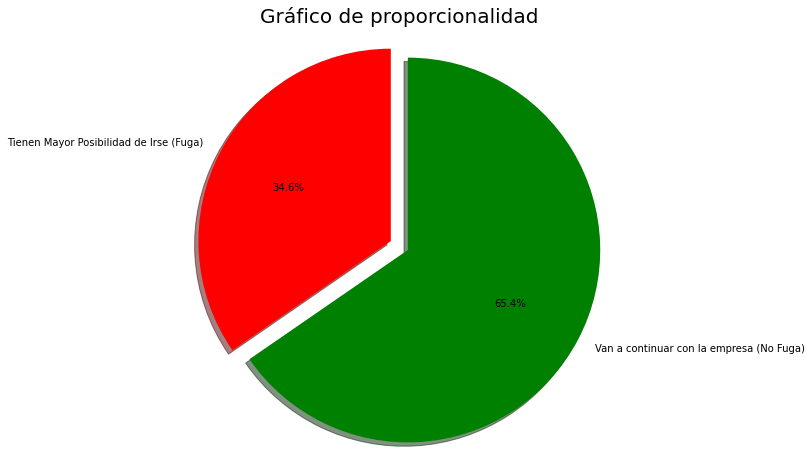

In [ ]:
# Verificamos si el dataset esta balanceado y mostramos un grafico de proporcionalidad
labels = 'Tienen Mayor Posibilidad de Irse (Fuga)', 'Van a continuar con la empresa (No Fuga)'
sizes = [count_fuga[1],count_fuga[0]] 
explode = (0, 0.1)
color=['red','green']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Gráfico de proporcionalidad", size = 20)
plt.show()

In [ ]:
df_cp_val.shape

Out[243]: (1150, 18)

In [ ]:
# Identificamos los clientes se van
df_fugados = df_cp_val[df_cp_val['FUGA']==1]
df_NoFugados = df_cp_val[df_cp_val['FUGA']==0]
df_fugados_res = df_origin[df_origin['FUGA']==1]
df_NoFugados_res = df_origin[df_origin['FUGA']==0]

In [ ]:
# Aqui podemos ver todos los registros detectados por el modelo predictivo que tienden a la FUGA
df_fugados

Out[245]:

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,SEGURO,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,FUGA
0,1,45,UNV,CAS,31,119,SANTIAGO,1.0,0,0.000000,12.157890,9.923143,0.000000,0.000000,6.030685,14.808763,12.261522,1
2,1,51,UNV,CAS,138,1,ARICA,1.0,1,13.341995,11.029180,12.501619,5.463832,7.977282,0.000000,13.910822,13.770904,1
7,1,45,TEC,SOL,138,1,ARICA,1.0,1,0.000000,12.385068,0.000000,1.386294,0.000000,4.454347,15.150512,12.385436,1
17,1,54,UNV,CAS,127,85,SANTIAGO,2.0,0,0.000000,13.134258,0.000000,6.042633,0.000000,4.762174,15.894952,13.135317,1
18,1,55,UNV,CAS,27,226,CONCEPCION,1.0,0,0.000000,12.213783,0.000000,0.000000,0.000000,3.891820,14.648420,12.214021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,53,UNV,CAS,155,88,SANTIAGO,1.0,0,0.000000,14.712189,0.000000,1.945910,0.000000,11.475618,15.894952,14.750737,1
1192,1,44,UNV,CAS,53,106,SANTIAGO,1.0,0,8.763272,12.491872,8.217169,6.710523,0.000000,1.609438,15.226498,14.242577,1
1193,1,43,UNV,CAS,80,88,SANTIAGO,3.0,0,0.000000,10.798963,11.724094,8.351847,9.164296,6.558198,13.910822,12.138709,1
1194,0,25,UNV,CAS,138,1,ARICA,1.0,0,0.000000,11.961903,11.714935,4.110874,0.000000,0.000000,14.346139,12.539383,1


In [ ]:
# Aqui podemos ver todos los registros detectados por el modelo predictivo que no tienden a la FUGA
df_NoFugados

Out[246]:

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,SEGURO,LOG_D_Marzo,LOG_D_Abril,LOG_D_Junio,LOG_D_Julio,LOG_D_Agosto,LOG_D_Septiembre,LOG_MONTO,LOG_DEUDA_TOTAL,FUGA
1,0,30,TEC,SOL,74,272,OTROS,0.0,0,0.000000,10.765428,0.000000,0.000000,0.000000,1.098612,14.457365,10.765470,0
3,0,41,MED,SOL,138,80,SANTIAGO,3.0,0,0.000000,6.961296,12.881239,7.581720,0.000000,6.930495,15.068274,12.891462,0
4,1,42,MED,CAS,52,91,SANTIAGO,1.0,0,0.000000,12.484874,11.384319,4.317488,0.000000,3.663562,14.508658,12.772386,0
5,0,39,MED,VIU,45,115,SANTIAGO,0.0,0,0.000000,0.000000,11.478282,0.000000,8.276649,5.976351,14.603968,11.522064,0
6,0,29,MED,SOL,117,86,SANTIAGO,1.0,0,0.000000,12.306569,0.000000,1.609438,0.000000,0.000000,13.710151,12.306587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0,57,MED,SOL,102,88,SANTIAGO,1.0,1,0.000000,13.905306,12.521314,0.693147,0.000000,0.000000,15.894952,14.128910,0
1195,0,49,UNV,CAS,31,119,SANTIAGO,2.0,0,13.048075,10.981166,12.437879,5.857933,8.890824,5.802118,14.690980,13.570984,0
1196,0,48,UNV,CAS,138,1,ARICA,1.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,7.427739,14.508658,7.427739,0
1197,0,41,TEC,SOL,30,91,SANTIAGO,1.0,1,0.000000,12.809342,0.000000,4.795791,0.000000,5.147494,14.403298,12.810137,0


In [ ]:
ciudad_val = analisis_matriz_contingencia(df_fugados['CIUDAD'], df_fugados['FUGA'], 'CIUDAD')

FUGA 1
CIUDAD 
ARICA 79
CONCEPCION 38
OTROS 21
SANTIAGO 260

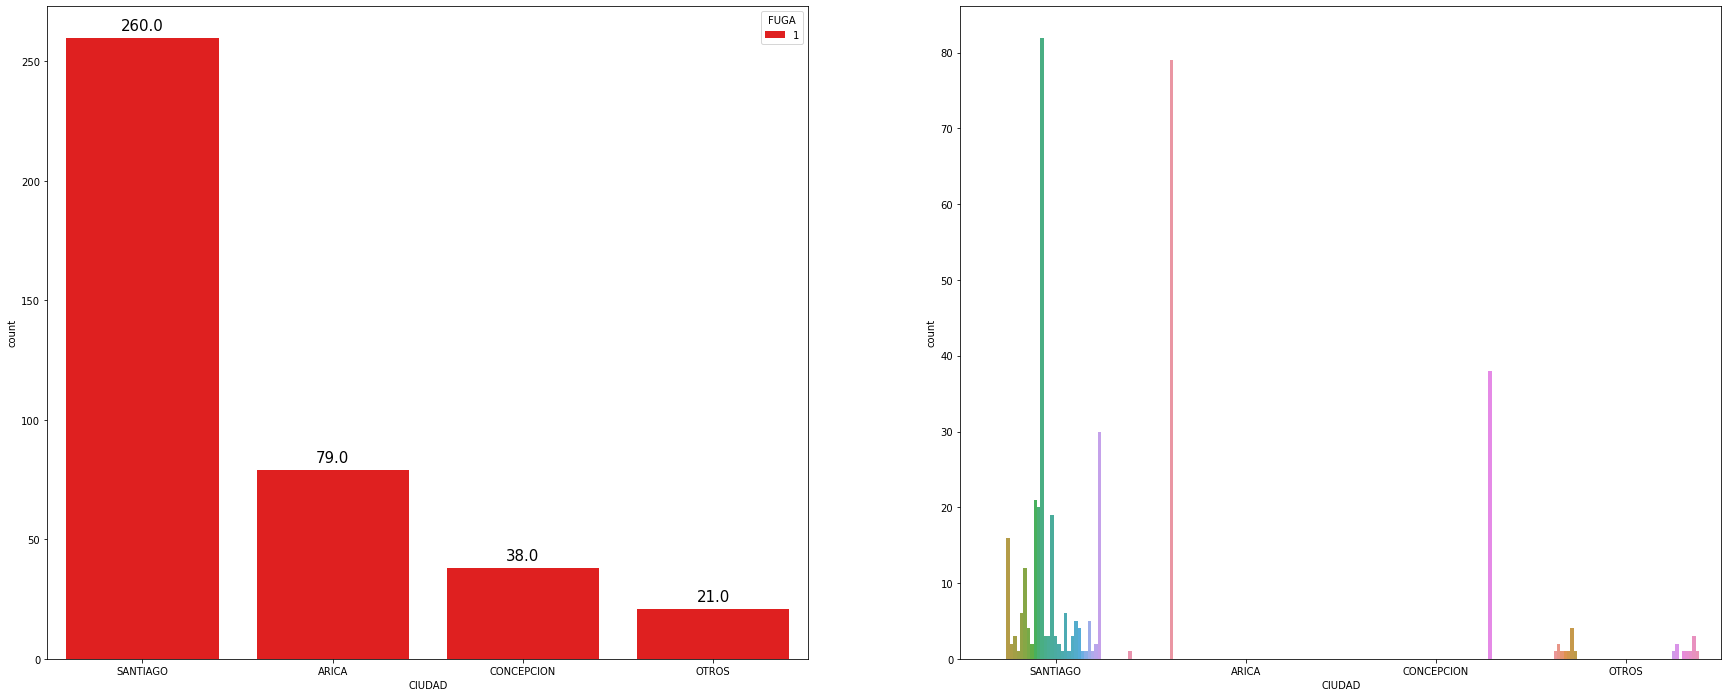

In [ ]:
color=['red']
fig, axarr = plt.subplots(1,2, figsize=(30, 12))
sn.countplot(x='CIUDAD', hue = 'FUGA', data = df_fugados, ax=axarr[0], palette=color)
sn.countplot(x='CIUDAD', hue = 'COD_COM', data = df_fugados, ax=axarr[1])
#plt.setp(axarr[0].get_xticklabels(), rotation=90)
for p, label in zip(axarr[0].patches, df_fugados['CIUDAD'].value_counts().index):
    axarr[0].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
    
axarr[1].get_legend().remove()

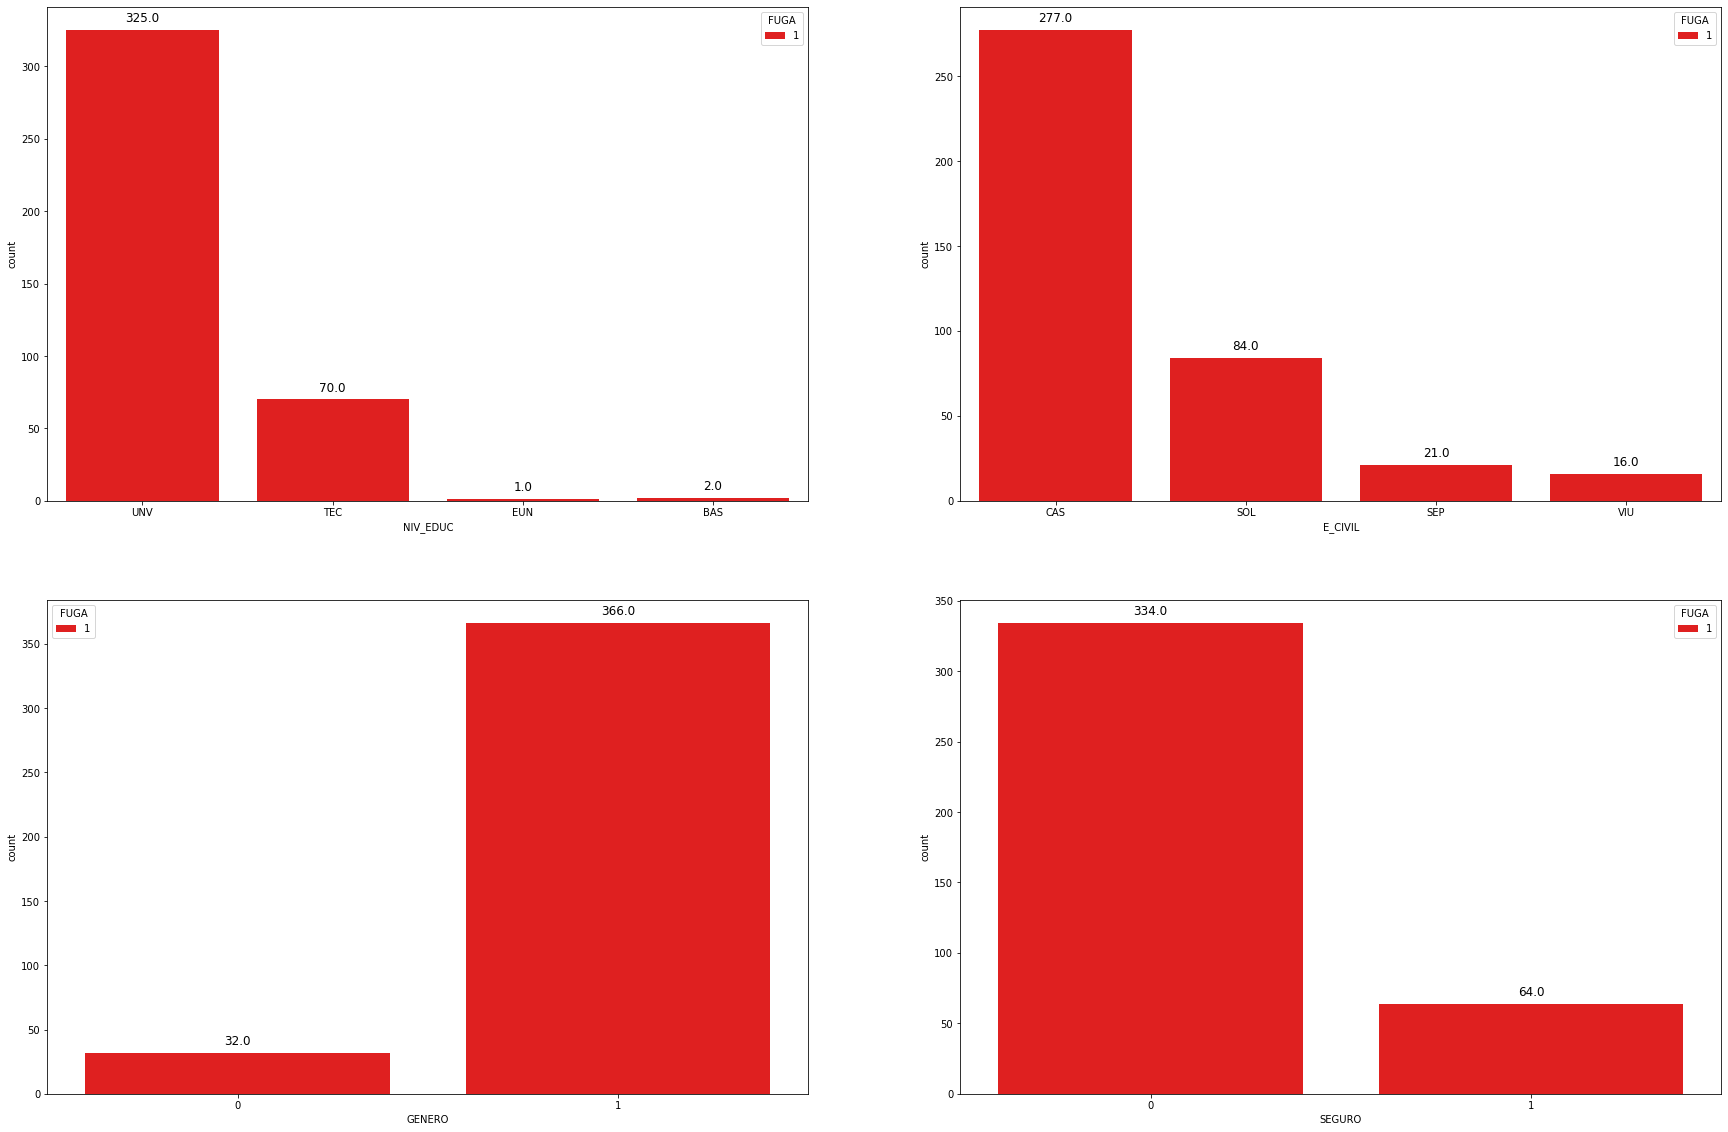

In [ ]:
# Seguimos con el analisis de variables categoricas para verificar su impacto con respecto a la variable objetivo.
color=['red']
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
sn.countplot(x='NIV_EDUC', hue = 'FUGA', data = df_fugados, ax=axarr[0][0], palette=color)
for p, label in zip(axarr[0][0].patches, df_fugados['CIUDAD'].value_counts().index):
    axarr[0][0].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
    
sn.countplot(x='E_CIVIL', hue = 'FUGA', data = df_fugados, ax=axarr[0][1], palette=color)
for p, label in zip(axarr[0][1].patches, df_fugados['CIUDAD'].value_counts().index):
    axarr[0][1].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 12), 
                   textcoords = 'offset points')

sn.countplot(x='GENERO', hue = 'FUGA', data = df_fugados, ax=axarr[1][0], palette=color)
for p, label in zip(axarr[1][0].patches, df_fugados['CIUDAD'].value_counts().index):
    axarr[1][0].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
sn.countplot(x='SEGURO', hue = 'FUGA', data = df_fugados, ax=axarr[1][1], palette=color)
for p, label in zip(axarr[1][1].patches, df_fugados['CIUDAD'].value_counts().index):
    axarr[1][1].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 12), 
                   textcoords = 'offset points')

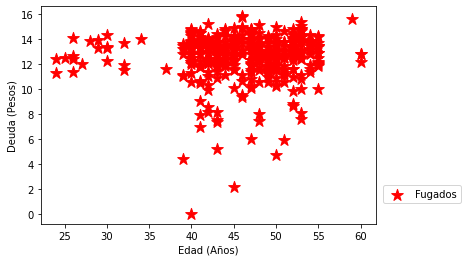

In [ ]:
# Obtenemos una gráfica de dispersión de la Edad de los clientes Fugados con respecto a la Deuda
plt.scatter(df_fugados['EDAD'], df_fugados['LOG_DEUDA_TOTAL'], marker="*", s=150, color="red", label="Fugados")
plt.ylabel("Deuda (Pesos)")
plt.xlabel("Edad (Años)")
plt.legend(bbox_to_anchor=(1.27, 0.2))
plt.show()